
Training a Classifier
=====================

This is it. In the previous notebooks you saw how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

What about data?
----------------

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

For this tutorial, we will use the CIFAR10 dataset.
It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

![](https://pytorch.org/tutorials/_images/cifar10.png)



Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalizing the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data
6. Loading and normalizing CIFAR10 dataset


By using ``torchvision`` library, it’s extremely easy to load CIFAR10.

In [1]:

%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

The output of torchvision datasets are (PIL Image) images of range [0, 1].
We transform them to Tensors of a new normalized range [-1, 1].

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Plot some of the images



Labels
 ship   deer    dog  horse


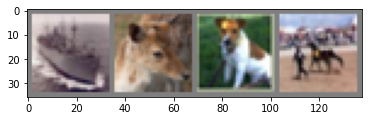

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# plot an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print('Labels\n'+'  '.join('%5s' % classes[labels[j]] for j in range(4)))


Create a neural network to classify images 


In [13]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().cuda()

 Define the Loss function and the optimizer.
In this example we use  Cross-Entropy loss and SGD optimizer.




In [14]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

Start the training.Images are fed to the network, then the loss is calculated and back-propagated to compute the gradients of all parameters. Finally the optimizer updates the netwotk parameters.



In [21]:


for epoch in range(4):

    training_loss = 0.0
    correct=0.
    total=0
    for i, data in enumerate(trainloader):
        inputs, labels = data
        inputs = inputs.cuda()
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels.cuda())
        loss.backward()
        optimizer.step()
        prediction = torch.max(outputs, 1)

        correct += np.sum(prediction[1].detach().cpu().numpy() == labels.cpu().numpy())
        total += labels.size(0)

        training_loss += loss.item()
        if i % 2000 == 1999:
            print('Epoch: %2d, Sample: %5d loss: %.3f Acc : %.3f' %
                  (epoch + 1, i + 1, training_loss / 2000,correct/total))
            training_loss = 0.0

print('Finished Training')

torch.Size([4, 10]) torch.Size([4])
0.0 4
torch.Size([4, 10]) torch.Size([4])
0.0 8
torch.Size([4, 10]) torch.Size([4])
0.0 12
torch.Size([4, 10]) torch.Size([4])
0.0 16
torch.Size([4, 10]) torch.Size([4])
0.0 20
torch.Size([4, 10]) torch.Size([4])
0.0 24
torch.Size([4, 10]) torch.Size([4])
0.0 28
torch.Size([4, 10]) torch.Size([4])
0.0 32
torch.Size([4, 10]) torch.Size([4])
0.0 36
torch.Size([4, 10]) torch.Size([4])
0.0 40
torch.Size([4, 10]) torch.Size([4])
0.0 44
torch.Size([4, 10]) torch.Size([4])
0.0 48
torch.Size([4, 10]) torch.Size([4])
0.0 52
torch.Size([4, 10]) torch.Size([4])
0.0 56
torch.Size([4, 10]) torch.Size([4])
0.0 60
torch.Size([4, 10]) torch.Size([4])
0.0 64
torch.Size([4, 10]) torch.Size([4])
0.0 68
torch.Size([4, 10]) torch.Size([4])
0.0 72
torch.Size([4, 10]) torch.Size([4])
0.0 76
torch.Size([4, 10]) torch.Size([4])
0.0 80
torch.Size([4, 10]) torch.Size([4])
0.0 84
torch.Size([4, 10]) torch.Size([4])
0.0 88
torch.Size([4, 10]) torch.Size([4])
0.0 92
torch.Size([4

/home/iliasprc/Documents/penvs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  from ipykernel import kernelapp as app


torch.Size([4, 10]) torch.Size([4])
0.0 180
torch.Size([4, 10]) torch.Size([4])
0.0 184
torch.Size([4, 10]) torch.Size([4])
0.0 188
torch.Size([4, 10]) torch.Size([4])
0.0 192
torch.Size([4, 10]) torch.Size([4])
0.0 196
torch.Size([4, 10]) torch.Size([4])
0.0 200
torch.Size([4, 10]) torch.Size([4])
0.0 204
torch.Size([4, 10]) torch.Size([4])
0.0 208
torch.Size([4, 10]) torch.Size([4])
0.0 212
torch.Size([4, 10]) torch.Size([4])
0.0 216
torch.Size([4, 10]) torch.Size([4])
0.0 220
torch.Size([4, 10]) torch.Size([4])
0.0 224
torch.Size([4, 10]) torch.Size([4])
0.0 228
torch.Size([4, 10]) torch.Size([4])
0.0 232
torch.Size([4, 10]) torch.Size([4])
0.0 236
torch.Size([4, 10]) torch.Size([4])
0.0 240
torch.Size([4, 10]) torch.Size([4])
0.0 244
torch.Size([4, 10]) torch.Size([4])
0.0 248
torch.Size([4, 10]) torch.Size([4])
0.0 252
torch.Size([4, 10]) torch.Size([4])
0.0 256
torch.Size([4, 10]) torch.Size([4])
0.0 260
torch.Size([4, 10]) torch.Size([4])
0.0 264
torch.Size([4, 10]) torch.Size([

0.0 1112
torch.Size([4, 10]) torch.Size([4])
0.0 1116
torch.Size([4, 10]) torch.Size([4])
0.0 1120
torch.Size([4, 10]) torch.Size([4])
0.0 1124
torch.Size([4, 10]) torch.Size([4])
0.0 1128
torch.Size([4, 10]) torch.Size([4])
0.0 1132
torch.Size([4, 10]) torch.Size([4])
0.0 1136
torch.Size([4, 10]) torch.Size([4])
0.0 1140
torch.Size([4, 10]) torch.Size([4])
0.0 1144
torch.Size([4, 10]) torch.Size([4])
0.0 1148
torch.Size([4, 10]) torch.Size([4])
0.0 1152
torch.Size([4, 10]) torch.Size([4])
0.0 1156
torch.Size([4, 10]) torch.Size([4])
0.0 1160
torch.Size([4, 10]) torch.Size([4])
0.0 1164
torch.Size([4, 10]) torch.Size([4])
0.0 1168
torch.Size([4, 10]) torch.Size([4])
0.0 1172
torch.Size([4, 10]) torch.Size([4])
0.0 1176
torch.Size([4, 10]) torch.Size([4])
0.0 1180
torch.Size([4, 10]) torch.Size([4])
0.0 1184
torch.Size([4, 10]) torch.Size([4])
0.0 1188
torch.Size([4, 10]) torch.Size([4])
0.0 1192
torch.Size([4, 10]) torch.Size([4])
0.0 1196
torch.Size([4, 10]) torch.Size([4])
0.0 1200
t

torch.Size([4, 10]) torch.Size([4])
0.0 1868
torch.Size([4, 10]) torch.Size([4])
0.0 1872
torch.Size([4, 10]) torch.Size([4])
0.0 1876
torch.Size([4, 10]) torch.Size([4])
0.0 1880
torch.Size([4, 10]) torch.Size([4])
0.0 1884
torch.Size([4, 10]) torch.Size([4])
0.0 1888
torch.Size([4, 10]) torch.Size([4])
0.0 1892
torch.Size([4, 10]) torch.Size([4])
0.0 1896
torch.Size([4, 10]) torch.Size([4])
0.0 1900
torch.Size([4, 10]) torch.Size([4])
0.0 1904
torch.Size([4, 10]) torch.Size([4])
0.0 1908
torch.Size([4, 10]) torch.Size([4])
0.0 1912
torch.Size([4, 10]) torch.Size([4])
0.0 1916
torch.Size([4, 10]) torch.Size([4])
0.0 1920
torch.Size([4, 10]) torch.Size([4])
0.0 1924
torch.Size([4, 10]) torch.Size([4])
0.0 1928
torch.Size([4, 10]) torch.Size([4])
0.0 1932
torch.Size([4, 10]) torch.Size([4])
0.0 1936
torch.Size([4, 10]) torch.Size([4])
0.0 1940
torch.Size([4, 10]) torch.Size([4])
0.0 1944
torch.Size([4, 10]) torch.Size([4])
0.0 1948
torch.Size([4, 10]) torch.Size([4])
0.0 1952
torch.Size

0.0 2640
torch.Size([4, 10]) torch.Size([4])
0.0 2644
torch.Size([4, 10]) torch.Size([4])
0.0 2648
torch.Size([4, 10]) torch.Size([4])
0.0 2652
torch.Size([4, 10]) torch.Size([4])
0.0 2656
torch.Size([4, 10]) torch.Size([4])
0.0 2660
torch.Size([4, 10]) torch.Size([4])
0.0 2664
torch.Size([4, 10]) torch.Size([4])
0.0 2668
torch.Size([4, 10]) torch.Size([4])
0.0 2672
torch.Size([4, 10]) torch.Size([4])
0.0 2676
torch.Size([4, 10]) torch.Size([4])
0.0 2680
torch.Size([4, 10]) torch.Size([4])
0.0 2684
torch.Size([4, 10]) torch.Size([4])
0.0 2688
torch.Size([4, 10]) torch.Size([4])
0.0 2692
torch.Size([4, 10]) torch.Size([4])
0.0 2696
torch.Size([4, 10]) torch.Size([4])
0.0 2700
torch.Size([4, 10]) torch.Size([4])
0.0 2704
torch.Size([4, 10]) torch.Size([4])
0.0 2708
torch.Size([4, 10]) torch.Size([4])
0.0 2712
torch.Size([4, 10]) torch.Size([4])
0.0 2716
torch.Size([4, 10]) torch.Size([4])
0.0 2720
torch.Size([4, 10]) torch.Size([4])
0.0 2724
torch.Size([4, 10]) torch.Size([4])
0.0 2728
t

torch.Size([4, 10]) torch.Size([4])
0.0 3500
torch.Size([4, 10]) torch.Size([4])
0.0 3504
torch.Size([4, 10]) torch.Size([4])
0.0 3508
torch.Size([4, 10]) torch.Size([4])
0.0 3512
torch.Size([4, 10]) torch.Size([4])
0.0 3516
torch.Size([4, 10]) torch.Size([4])
0.0 3520
torch.Size([4, 10]) torch.Size([4])
0.0 3524
torch.Size([4, 10]) torch.Size([4])
0.0 3528
torch.Size([4, 10]) torch.Size([4])
0.0 3532
torch.Size([4, 10]) torch.Size([4])
0.0 3536
torch.Size([4, 10]) torch.Size([4])
0.0 3540
torch.Size([4, 10]) torch.Size([4])
0.0 3544
torch.Size([4, 10]) torch.Size([4])
0.0 3548
torch.Size([4, 10]) torch.Size([4])
0.0 3552
torch.Size([4, 10]) torch.Size([4])
0.0 3556
torch.Size([4, 10]) torch.Size([4])
0.0 3560
torch.Size([4, 10]) torch.Size([4])
0.0 3564
torch.Size([4, 10]) torch.Size([4])
0.0 3568
torch.Size([4, 10]) torch.Size([4])
0.0 3572
torch.Size([4, 10]) torch.Size([4])
0.0 3576
torch.Size([4, 10]) torch.Size([4])
0.0 3580
torch.Size([4, 10]) torch.Size([4])
0.0 3584
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 4404
torch.Size([4, 10]) torch.Size([4])
0.0 4408
torch.Size([4, 10]) torch.Size([4])
0.0 4412
torch.Size([4, 10]) torch.Size([4])
0.0 4416
torch.Size([4, 10]) torch.Size([4])
0.0 4420
torch.Size([4, 10]) torch.Size([4])
0.0 4424
torch.Size([4, 10]) torch.Size([4])
0.0 4428
torch.Size([4, 10]) torch.Size([4])
0.0 4432
torch.Size([4, 10]) torch.Size([4])
0.0 4436
torch.Size([4, 10]) torch.Size([4])
0.0 4440
torch.Size([4, 10]) torch.Size([4])
0.0 4444
torch.Size([4, 10]) torch.Size([4])
0.0 4448
torch.Size([4, 10]) torch.Size([4])
0.0 4452
torch.Size([4, 10]) torch.Size([4])
0.0 4456
torch.Size([4, 10]) torch.Size([4])
0.0 4460
torch.Size([4, 10]) torch.Size([4])
0.0 4464
torch.Size([4, 10]) torch.Size([4])
0.0 4468
torch.Size([4, 10]) torch.Size([4])
0.0 4472
torch.Size([4, 10]) torch.Size([4])
0.0 4476
torch.Size([4, 10]) torch.Size([4])
0.0 4480
torch.Size([4, 10]) torch.Size([4])
0.0 4484
torch.Size([4, 10]) torch.Size([4])
0.0 4488
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 5312
torch.Size([4, 10]) torch.Size([4])
0.0 5316
torch.Size([4, 10]) torch.Size([4])
0.0 5320
torch.Size([4, 10]) torch.Size([4])
0.0 5324
torch.Size([4, 10]) torch.Size([4])
0.0 5328
torch.Size([4, 10]) torch.Size([4])
0.0 5332
torch.Size([4, 10]) torch.Size([4])
0.0 5336
torch.Size([4, 10]) torch.Size([4])
0.0 5340
torch.Size([4, 10]) torch.Size([4])
0.0 5344
torch.Size([4, 10]) torch.Size([4])
0.0 5348
torch.Size([4, 10]) torch.Size([4])
0.0 5352
torch.Size([4, 10]) torch.Size([4])
0.0 5356
torch.Size([4, 10]) torch.Size([4])
0.0 5360
torch.Size([4, 10]) torch.Size([4])
0.0 5364
torch.Size([4, 10]) torch.Size([4])
0.0 5368
torch.Size([4, 10]) torch.Size([4])
0.0 5372
torch.Size([4, 10]) torch.Size([4])
0.0 5376
torch.Size([4, 10]) torch.Size([4])
0.0 5380
torch.Size([4, 10]) torch.Size([4])
0.0 5384
torch.Size([4, 10]) torch.Size([4])
0.0 5388
torch.Size([4, 10]) torch.Size([4])
0.0 5392
torch.Size([4, 10]) torch.Size([4])
0.0 5396
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 6172
torch.Size([4, 10]) torch.Size([4])
0.0 6176
torch.Size([4, 10]) torch.Size([4])
0.0 6180
torch.Size([4, 10]) torch.Size([4])
0.0 6184
torch.Size([4, 10]) torch.Size([4])
0.0 6188
torch.Size([4, 10]) torch.Size([4])
0.0 6192
torch.Size([4, 10]) torch.Size([4])
0.0 6196
torch.Size([4, 10]) torch.Size([4])
0.0 6200
torch.Size([4, 10]) torch.Size([4])
0.0 6204
torch.Size([4, 10]) torch.Size([4])
0.0 6208
torch.Size([4, 10]) torch.Size([4])
0.0 6212
torch.Size([4, 10]) torch.Size([4])
0.0 6216
torch.Size([4, 10]) torch.Size([4])
0.0 6220
torch.Size([4, 10]) torch.Size([4])
0.0 6224
torch.Size([4, 10]) torch.Size([4])
0.0 6228
torch.Size([4, 10]) torch.Size([4])
0.0 6232
torch.Size([4, 10]) torch.Size([4])
0.0 6236
torch.Size([4, 10]) torch.Size([4])
0.0 6240
torch.Size([4, 10]) torch.Size([4])
0.0 6244
torch.Size([4, 10]) torch.Size([4])
0.0 6248
torch.Size([4, 10]) torch.Size([4])
0.0 6252
torch.Size([4, 10]) torch.Size([4])
0.0 6256
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 6972
torch.Size([4, 10]) torch.Size([4])
0.0 6976
torch.Size([4, 10]) torch.Size([4])
0.0 6980
torch.Size([4, 10]) torch.Size([4])
0.0 6984
torch.Size([4, 10]) torch.Size([4])
0.0 6988
torch.Size([4, 10]) torch.Size([4])
0.0 6992
torch.Size([4, 10]) torch.Size([4])
0.0 6996
torch.Size([4, 10]) torch.Size([4])
0.0 7000
torch.Size([4, 10]) torch.Size([4])
0.0 7004
torch.Size([4, 10]) torch.Size([4])
0.0 7008
torch.Size([4, 10]) torch.Size([4])
0.0 7012
torch.Size([4, 10]) torch.Size([4])
0.0 7016
torch.Size([4, 10]) torch.Size([4])
0.0 7020
torch.Size([4, 10]) torch.Size([4])
0.0 7024
torch.Size([4, 10]) torch.Size([4])
0.0 7028
torch.Size([4, 10]) torch.Size([4])
0.0 7032
torch.Size([4, 10]) torch.Size([4])
0.0 7036
torch.Size([4, 10]) torch.Size([4])
0.0 7040
torch.Size([4, 10]) torch.Size([4])
0.0 7044
torch.Size([4, 10]) torch.Size([4])
0.0 7048
torch.Size([4, 10]) torch.Size([4])
0.0 7052
torch.Size([4, 10]) torch.Size([4])
0.0 7056
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 7848
torch.Size([4, 10]) torch.Size([4])
0.0 7852
torch.Size([4, 10]) torch.Size([4])
0.0 7856
torch.Size([4, 10]) torch.Size([4])
0.0 7860
torch.Size([4, 10]) torch.Size([4])
0.0 7864
torch.Size([4, 10]) torch.Size([4])
0.0 7868
torch.Size([4, 10]) torch.Size([4])
0.0 7872
torch.Size([4, 10]) torch.Size([4])
0.0 7876
torch.Size([4, 10]) torch.Size([4])
0.0 7880
torch.Size([4, 10]) torch.Size([4])
0.0 7884
torch.Size([4, 10]) torch.Size([4])
0.0 7888
torch.Size([4, 10]) torch.Size([4])
0.0 7892
torch.Size([4, 10]) torch.Size([4])
0.0 7896
torch.Size([4, 10]) torch.Size([4])
0.0 7900
torch.Size([4, 10]) torch.Size([4])
0.0 7904
torch.Size([4, 10]) torch.Size([4])
0.0 7908
torch.Size([4, 10]) torch.Size([4])
0.0 7912
torch.Size([4, 10]) torch.Size([4])
0.0 7916
torch.Size([4, 10]) torch.Size([4])
0.0 7920
torch.Size([4, 10]) torch.Size([4])
0.0 7924
torch.Size([4, 10]) torch.Size([4])
0.0 7928
torch.Size([4, 10]) torch.Size([4])
0.0 7932
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 8732
torch.Size([4, 10]) torch.Size([4])
0.0 8736
torch.Size([4, 10]) torch.Size([4])
0.0 8740
torch.Size([4, 10]) torch.Size([4])
0.0 8744
torch.Size([4, 10]) torch.Size([4])
0.0 8748
torch.Size([4, 10]) torch.Size([4])
0.0 8752
torch.Size([4, 10]) torch.Size([4])
0.0 8756
torch.Size([4, 10]) torch.Size([4])
0.0 8760
torch.Size([4, 10]) torch.Size([4])
0.0 8764
torch.Size([4, 10]) torch.Size([4])
0.0 8768
torch.Size([4, 10]) torch.Size([4])
0.0 8772
torch.Size([4, 10]) torch.Size([4])
0.0 8776
torch.Size([4, 10]) torch.Size([4])
0.0 8780
torch.Size([4, 10]) torch.Size([4])
0.0 8784
torch.Size([4, 10]) torch.Size([4])
0.0 8788
torch.Size([4, 10]) torch.Size([4])
0.0 8792
torch.Size([4, 10]) torch.Size([4])
0.0 8796
torch.Size([4, 10]) torch.Size([4])
0.0 8800
torch.Size([4, 10]) torch.Size([4])
0.0 8804
torch.Size([4, 10]) torch.Size([4])
0.0 8808
torch.Size([4, 10]) torch.Size([4])
0.0 8812
torch.Size([4, 10]) torch.Size([4])
0.0 8816
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 9592
torch.Size([4, 10]) torch.Size([4])
0.0 9596
torch.Size([4, 10]) torch.Size([4])
0.0 9600
torch.Size([4, 10]) torch.Size([4])
0.0 9604
torch.Size([4, 10]) torch.Size([4])
0.0 9608
torch.Size([4, 10]) torch.Size([4])
0.0 9612
torch.Size([4, 10]) torch.Size([4])
0.0 9616
torch.Size([4, 10]) torch.Size([4])
0.0 9620
torch.Size([4, 10]) torch.Size([4])
0.0 9624
torch.Size([4, 10]) torch.Size([4])
0.0 9628
torch.Size([4, 10]) torch.Size([4])
0.0 9632
torch.Size([4, 10]) torch.Size([4])
0.0 9636
torch.Size([4, 10]) torch.Size([4])
0.0 9640
torch.Size([4, 10]) torch.Size([4])
0.0 9644
torch.Size([4, 10]) torch.Size([4])
0.0 9648
torch.Size([4, 10]) torch.Size([4])
0.0 9652
torch.Size([4, 10]) torch.Size([4])
0.0 9656
torch.Size([4, 10]) torch.Size([4])
0.0 9660
torch.Size([4, 10]) torch.Size([4])
0.0 9664
torch.Size([4, 10]) torch.Size([4])
0.0 9668
torch.Size([4, 10]) torch.Size([4])
0.0 9672
torch.Size([4, 10]) torch.Size([4])
0.0 9676
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 10380
torch.Size([4, 10]) torch.Size([4])
0.0 10384
torch.Size([4, 10]) torch.Size([4])
0.0 10388
torch.Size([4, 10]) torch.Size([4])
0.0 10392
torch.Size([4, 10]) torch.Size([4])
0.0 10396
torch.Size([4, 10]) torch.Size([4])
0.0 10400
torch.Size([4, 10]) torch.Size([4])
0.0 10404
torch.Size([4, 10]) torch.Size([4])
0.0 10408
torch.Size([4, 10]) torch.Size([4])
0.0 10412
torch.Size([4, 10]) torch.Size([4])
0.0 10416
torch.Size([4, 10]) torch.Size([4])
0.0 10420
torch.Size([4, 10]) torch.Size([4])
0.0 10424
torch.Size([4, 10]) torch.Size([4])
0.0 10428
torch.Size([4, 10]) torch.Size([4])
0.0 10432
torch.Size([4, 10]) torch.Size([4])
0.0 10436
torch.Size([4, 10]) torch.Size([4])
0.0 10440
torch.Size([4, 10]) torch.Size([4])
0.0 10444
torch.Size([4, 10]) torch.Size([4])
0.0 10448
torch.Size([4, 10]) torch.Size([4])
0.0 10452
torch.Size([4, 10]) torch.Size([4])
0.0 10456
torch.Size([4, 10]) torch.Size([4])
0.0 10460
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 11128
torch.Size([4, 10]) torch.Size([4])
0.0 11132
torch.Size([4, 10]) torch.Size([4])
0.0 11136
torch.Size([4, 10]) torch.Size([4])
0.0 11140
torch.Size([4, 10]) torch.Size([4])
0.0 11144
torch.Size([4, 10]) torch.Size([4])
0.0 11148
torch.Size([4, 10]) torch.Size([4])
0.0 11152
torch.Size([4, 10]) torch.Size([4])
0.0 11156
torch.Size([4, 10]) torch.Size([4])
0.0 11160
torch.Size([4, 10]) torch.Size([4])
0.0 11164
torch.Size([4, 10]) torch.Size([4])
0.0 11168
torch.Size([4, 10]) torch.Size([4])
0.0 11172
torch.Size([4, 10]) torch.Size([4])
0.0 11176
torch.Size([4, 10]) torch.Size([4])
0.0 11180
torch.Size([4, 10]) torch.Size([4])
0.0 11184
torch.Size([4, 10]) torch.Size([4])
0.0 11188
torch.Size([4, 10]) torch.Size([4])
0.0 11192
torch.Size([4, 10]) torch.Size([4])
0.0 11196
torch.Size([4, 10]) torch.Size([4])
0.0 11200
torch.Size([4, 10]) torch.Size([4])
0.0 11204
torch.Size([4, 10]) torch.Size([4])
0.0 11208
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 11928
torch.Size([4, 10]) torch.Size([4])
0.0 11932
torch.Size([4, 10]) torch.Size([4])
0.0 11936
torch.Size([4, 10]) torch.Size([4])
0.0 11940
torch.Size([4, 10]) torch.Size([4])
0.0 11944
torch.Size([4, 10]) torch.Size([4])
0.0 11948
torch.Size([4, 10]) torch.Size([4])
0.0 11952
torch.Size([4, 10]) torch.Size([4])
0.0 11956
torch.Size([4, 10]) torch.Size([4])
0.0 11960
torch.Size([4, 10]) torch.Size([4])
0.0 11964
torch.Size([4, 10]) torch.Size([4])
0.0 11968
torch.Size([4, 10]) torch.Size([4])
0.0 11972
torch.Size([4, 10]) torch.Size([4])
0.0 11976
torch.Size([4, 10]) torch.Size([4])
0.0 11980
torch.Size([4, 10]) torch.Size([4])
0.0 11984
torch.Size([4, 10]) torch.Size([4])
0.0 11988
torch.Size([4, 10]) torch.Size([4])
0.0 11992
torch.Size([4, 10]) torch.Size([4])
0.0 11996
torch.Size([4, 10]) torch.Size([4])
0.0 12000
torch.Size([4, 10]) torch.Size([4])
0.0 12004
torch.Size([4, 10]) torch.Size([4])
0.0 12008
torch.Size([4, 10]) torch.Size([4]

0.0 12760
torch.Size([4, 10]) torch.Size([4])
0.0 12764
torch.Size([4, 10]) torch.Size([4])
0.0 12768
torch.Size([4, 10]) torch.Size([4])
0.0 12772
torch.Size([4, 10]) torch.Size([4])
0.0 12776
torch.Size([4, 10]) torch.Size([4])
0.0 12780
torch.Size([4, 10]) torch.Size([4])
0.0 12784
torch.Size([4, 10]) torch.Size([4])
0.0 12788
torch.Size([4, 10]) torch.Size([4])
0.0 12792
torch.Size([4, 10]) torch.Size([4])
0.0 12796
torch.Size([4, 10]) torch.Size([4])
0.0 12800
torch.Size([4, 10]) torch.Size([4])
0.0 12804
torch.Size([4, 10]) torch.Size([4])
0.0 12808
torch.Size([4, 10]) torch.Size([4])
0.0 12812
torch.Size([4, 10]) torch.Size([4])
0.0 12816
torch.Size([4, 10]) torch.Size([4])
0.0 12820
torch.Size([4, 10]) torch.Size([4])
0.0 12824
torch.Size([4, 10]) torch.Size([4])
0.0 12828
torch.Size([4, 10]) torch.Size([4])
0.0 12832
torch.Size([4, 10]) torch.Size([4])
0.0 12836
torch.Size([4, 10]) torch.Size([4])
0.0 12840
torch.Size([4, 10]) torch.Size([4])
0.0 12844
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 13592
torch.Size([4, 10]) torch.Size([4])
0.0 13596
torch.Size([4, 10]) torch.Size([4])
0.0 13600
torch.Size([4, 10]) torch.Size([4])
0.0 13604
torch.Size([4, 10]) torch.Size([4])
0.0 13608
torch.Size([4, 10]) torch.Size([4])
0.0 13612
torch.Size([4, 10]) torch.Size([4])
0.0 13616
torch.Size([4, 10]) torch.Size([4])
0.0 13620
torch.Size([4, 10]) torch.Size([4])
0.0 13624
torch.Size([4, 10]) torch.Size([4])
0.0 13628
torch.Size([4, 10]) torch.Size([4])
0.0 13632
torch.Size([4, 10]) torch.Size([4])
0.0 13636
torch.Size([4, 10]) torch.Size([4])
0.0 13640
torch.Size([4, 10]) torch.Size([4])
0.0 13644
torch.Size([4, 10]) torch.Size([4])
0.0 13648
torch.Size([4, 10]) torch.Size([4])
0.0 13652
torch.Size([4, 10]) torch.Size([4])
0.0 13656
torch.Size([4, 10]) torch.Size([4])
0.0 13660
torch.Size([4, 10]) torch.Size([4])
0.0 13664
torch.Size([4, 10]) torch.Size([4])
0.0 13668
torch.Size([4, 10]) torch.Size([4])
0.0 13672
torch.Size([4, 10]) torch.Size([4]

0.0 14376
torch.Size([4, 10]) torch.Size([4])
0.0 14380
torch.Size([4, 10]) torch.Size([4])
0.0 14384
torch.Size([4, 10]) torch.Size([4])
0.0 14388
torch.Size([4, 10]) torch.Size([4])
0.0 14392
torch.Size([4, 10]) torch.Size([4])
0.0 14396
torch.Size([4, 10]) torch.Size([4])
0.0 14400
torch.Size([4, 10]) torch.Size([4])
0.0 14404
torch.Size([4, 10]) torch.Size([4])
0.0 14408
torch.Size([4, 10]) torch.Size([4])
0.0 14412
torch.Size([4, 10]) torch.Size([4])
0.0 14416
torch.Size([4, 10]) torch.Size([4])
0.0 14420
torch.Size([4, 10]) torch.Size([4])
0.0 14424
torch.Size([4, 10]) torch.Size([4])
0.0 14428
torch.Size([4, 10]) torch.Size([4])
0.0 14432
torch.Size([4, 10]) torch.Size([4])
0.0 14436
torch.Size([4, 10]) torch.Size([4])
0.0 14440
torch.Size([4, 10]) torch.Size([4])
0.0 14444
torch.Size([4, 10]) torch.Size([4])
0.0 14448
torch.Size([4, 10]) torch.Size([4])
0.0 14452
torch.Size([4, 10]) torch.Size([4])
0.0 14456
torch.Size([4, 10]) torch.Size([4])
0.0 14460
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 15192
torch.Size([4, 10]) torch.Size([4])
0.0 15196
torch.Size([4, 10]) torch.Size([4])
0.0 15200
torch.Size([4, 10]) torch.Size([4])
0.0 15204
torch.Size([4, 10]) torch.Size([4])
0.0 15208
torch.Size([4, 10]) torch.Size([4])
0.0 15212
torch.Size([4, 10]) torch.Size([4])
0.0 15216
torch.Size([4, 10]) torch.Size([4])
0.0 15220
torch.Size([4, 10]) torch.Size([4])
0.0 15224
torch.Size([4, 10]) torch.Size([4])
0.0 15228
torch.Size([4, 10]) torch.Size([4])
0.0 15232
torch.Size([4, 10]) torch.Size([4])
0.0 15236
torch.Size([4, 10]) torch.Size([4])
0.0 15240
torch.Size([4, 10]) torch.Size([4])
0.0 15244
torch.Size([4, 10]) torch.Size([4])
0.0 15248
torch.Size([4, 10]) torch.Size([4])
0.0 15252
torch.Size([4, 10]) torch.Size([4])
0.0 15256
torch.Size([4, 10]) torch.Size([4])
0.0 15260
torch.Size([4, 10]) torch.Size([4])
0.0 15264
torch.Size([4, 10]) torch.Size([4])
0.0 15268
torch.Size([4, 10]) torch.Size([4])
0.0 15272
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 16068
torch.Size([4, 10]) torch.Size([4])
0.0 16072
torch.Size([4, 10]) torch.Size([4])
0.0 16076
torch.Size([4, 10]) torch.Size([4])
0.0 16080
torch.Size([4, 10]) torch.Size([4])
0.0 16084
torch.Size([4, 10]) torch.Size([4])
0.0 16088
torch.Size([4, 10]) torch.Size([4])
0.0 16092
torch.Size([4, 10]) torch.Size([4])
0.0 16096
torch.Size([4, 10]) torch.Size([4])
0.0 16100
torch.Size([4, 10]) torch.Size([4])
0.0 16104
torch.Size([4, 10]) torch.Size([4])
0.0 16108
torch.Size([4, 10]) torch.Size([4])
0.0 16112
torch.Size([4, 10]) torch.Size([4])
0.0 16116
torch.Size([4, 10]) torch.Size([4])
0.0 16120
torch.Size([4, 10]) torch.Size([4])
0.0 16124
torch.Size([4, 10]) torch.Size([4])
0.0 16128
torch.Size([4, 10]) torch.Size([4])
0.0 16132
torch.Size([4, 10]) torch.Size([4])
0.0 16136
torch.Size([4, 10]) torch.Size([4])
0.0 16140
torch.Size([4, 10]) torch.Size([4])
0.0 16144
torch.Size([4, 10]) torch.Size([4])
0.0 16148
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 16960
torch.Size([4, 10]) torch.Size([4])
0.0 16964
torch.Size([4, 10]) torch.Size([4])
0.0 16968
torch.Size([4, 10]) torch.Size([4])
0.0 16972
torch.Size([4, 10]) torch.Size([4])
0.0 16976
torch.Size([4, 10]) torch.Size([4])
0.0 16980
torch.Size([4, 10]) torch.Size([4])
0.0 16984
torch.Size([4, 10]) torch.Size([4])
0.0 16988
torch.Size([4, 10]) torch.Size([4])
0.0 16992
torch.Size([4, 10]) torch.Size([4])
0.0 16996
torch.Size([4, 10]) torch.Size([4])
0.0 17000
torch.Size([4, 10]) torch.Size([4])
0.0 17004
torch.Size([4, 10]) torch.Size([4])
0.0 17008
torch.Size([4, 10]) torch.Size([4])
0.0 17012
torch.Size([4, 10]) torch.Size([4])
0.0 17016
torch.Size([4, 10]) torch.Size([4])
0.0 17020
torch.Size([4, 10]) torch.Size([4])
0.0 17024
torch.Size([4, 10]) torch.Size([4])
0.0 17028
torch.Size([4, 10]) torch.Size([4])
0.0 17032
torch.Size([4, 10]) torch.Size([4])
0.0 17036
torch.Size([4, 10]) torch.Size([4])
0.0 17040
torch.Size([4, 10]) torch.Size([4]

0.0 17688
torch.Size([4, 10]) torch.Size([4])
0.0 17692
torch.Size([4, 10]) torch.Size([4])
0.0 17696
torch.Size([4, 10]) torch.Size([4])
0.0 17700
torch.Size([4, 10]) torch.Size([4])
0.0 17704
torch.Size([4, 10]) torch.Size([4])
0.0 17708
torch.Size([4, 10]) torch.Size([4])
0.0 17712
torch.Size([4, 10]) torch.Size([4])
0.0 17716
torch.Size([4, 10]) torch.Size([4])
0.0 17720
torch.Size([4, 10]) torch.Size([4])
0.0 17724
torch.Size([4, 10]) torch.Size([4])
0.0 17728
torch.Size([4, 10]) torch.Size([4])
0.0 17732
torch.Size([4, 10]) torch.Size([4])
0.0 17736
torch.Size([4, 10]) torch.Size([4])
0.0 17740
torch.Size([4, 10]) torch.Size([4])
0.0 17744
torch.Size([4, 10]) torch.Size([4])
0.0 17748
torch.Size([4, 10]) torch.Size([4])
0.0 17752
torch.Size([4, 10]) torch.Size([4])
0.0 17756
torch.Size([4, 10]) torch.Size([4])
0.0 17760
torch.Size([4, 10]) torch.Size([4])
0.0 17764
torch.Size([4, 10]) torch.Size([4])
0.0 17768
torch.Size([4, 10]) torch.Size([4])
0.0 17772
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 18576
torch.Size([4, 10]) torch.Size([4])
0.0 18580
torch.Size([4, 10]) torch.Size([4])
0.0 18584
torch.Size([4, 10]) torch.Size([4])
0.0 18588
torch.Size([4, 10]) torch.Size([4])
0.0 18592
torch.Size([4, 10]) torch.Size([4])
0.0 18596
torch.Size([4, 10]) torch.Size([4])
0.0 18600
torch.Size([4, 10]) torch.Size([4])
0.0 18604
torch.Size([4, 10]) torch.Size([4])
0.0 18608
torch.Size([4, 10]) torch.Size([4])
0.0 18612
torch.Size([4, 10]) torch.Size([4])
0.0 18616
torch.Size([4, 10]) torch.Size([4])
0.0 18620
torch.Size([4, 10]) torch.Size([4])
0.0 18624
torch.Size([4, 10]) torch.Size([4])
0.0 18628
torch.Size([4, 10]) torch.Size([4])
0.0 18632
torch.Size([4, 10]) torch.Size([4])
0.0 18636
torch.Size([4, 10]) torch.Size([4])
0.0 18640
torch.Size([4, 10]) torch.Size([4])
0.0 18644
torch.Size([4, 10]) torch.Size([4])
0.0 18648
torch.Size([4, 10]) torch.Size([4])
0.0 18652
torch.Size([4, 10]) torch.Size([4])
0.0 18656
torch.Size([4, 10]) torch.Size([4]

0.0 19420
torch.Size([4, 10]) torch.Size([4])
0.0 19424
torch.Size([4, 10]) torch.Size([4])
0.0 19428
torch.Size([4, 10]) torch.Size([4])
0.0 19432
torch.Size([4, 10]) torch.Size([4])
0.0 19436
torch.Size([4, 10]) torch.Size([4])
0.0 19440
torch.Size([4, 10]) torch.Size([4])
0.0 19444
torch.Size([4, 10]) torch.Size([4])
0.0 19448
torch.Size([4, 10]) torch.Size([4])
0.0 19452
torch.Size([4, 10]) torch.Size([4])
0.0 19456
torch.Size([4, 10]) torch.Size([4])
0.0 19460
torch.Size([4, 10]) torch.Size([4])
0.0 19464
torch.Size([4, 10]) torch.Size([4])
0.0 19468
torch.Size([4, 10]) torch.Size([4])
0.0 19472
torch.Size([4, 10]) torch.Size([4])
0.0 19476
torch.Size([4, 10]) torch.Size([4])
0.0 19480
torch.Size([4, 10]) torch.Size([4])
0.0 19484
torch.Size([4, 10]) torch.Size([4])
0.0 19488
torch.Size([4, 10]) torch.Size([4])
0.0 19492
torch.Size([4, 10]) torch.Size([4])
0.0 19496
torch.Size([4, 10]) torch.Size([4])
0.0 19500
torch.Size([4, 10]) torch.Size([4])
0.0 19504
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 20284
torch.Size([4, 10]) torch.Size([4])
0.0 20288
torch.Size([4, 10]) torch.Size([4])
0.0 20292
torch.Size([4, 10]) torch.Size([4])
0.0 20296
torch.Size([4, 10]) torch.Size([4])
0.0 20300
torch.Size([4, 10]) torch.Size([4])
0.0 20304
torch.Size([4, 10]) torch.Size([4])
0.0 20308
torch.Size([4, 10]) torch.Size([4])
0.0 20312
torch.Size([4, 10]) torch.Size([4])
0.0 20316
torch.Size([4, 10]) torch.Size([4])
0.0 20320
torch.Size([4, 10]) torch.Size([4])
0.0 20324
torch.Size([4, 10]) torch.Size([4])
0.0 20328
torch.Size([4, 10]) torch.Size([4])
0.0 20332
torch.Size([4, 10]) torch.Size([4])
0.0 20336
torch.Size([4, 10]) torch.Size([4])
0.0 20340
torch.Size([4, 10]) torch.Size([4])
0.0 20344
torch.Size([4, 10]) torch.Size([4])
0.0 20348
torch.Size([4, 10]) torch.Size([4])
0.0 20352
torch.Size([4, 10]) torch.Size([4])
0.0 20356
torch.Size([4, 10]) torch.Size([4])
0.0 20360
torch.Size([4, 10]) torch.Size([4])
0.0 20364
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 21124
torch.Size([4, 10]) torch.Size([4])
0.0 21128
torch.Size([4, 10]) torch.Size([4])
0.0 21132
torch.Size([4, 10]) torch.Size([4])
0.0 21136
torch.Size([4, 10]) torch.Size([4])
0.0 21140
torch.Size([4, 10]) torch.Size([4])
0.0 21144
torch.Size([4, 10]) torch.Size([4])
0.0 21148
torch.Size([4, 10]) torch.Size([4])
0.0 21152
torch.Size([4, 10]) torch.Size([4])
0.0 21156
torch.Size([4, 10]) torch.Size([4])
0.0 21160
torch.Size([4, 10]) torch.Size([4])
0.0 21164
torch.Size([4, 10]) torch.Size([4])
0.0 21168
torch.Size([4, 10]) torch.Size([4])
0.0 21172
torch.Size([4, 10]) torch.Size([4])
0.0 21176
torch.Size([4, 10]) torch.Size([4])
0.0 21180
torch.Size([4, 10]) torch.Size([4])
0.0 21184
torch.Size([4, 10]) torch.Size([4])
0.0 21188
torch.Size([4, 10]) torch.Size([4])
0.0 21192
torch.Size([4, 10]) torch.Size([4])
0.0 21196
torch.Size([4, 10]) torch.Size([4])
0.0 21200
torch.Size([4, 10]) torch.Size([4])
0.0 21204
torch.Size([4, 10]) torch.Size([4]

0.0 21864
torch.Size([4, 10]) torch.Size([4])
0.0 21868
torch.Size([4, 10]) torch.Size([4])
0.0 21872
torch.Size([4, 10]) torch.Size([4])
0.0 21876
torch.Size([4, 10]) torch.Size([4])
0.0 21880
torch.Size([4, 10]) torch.Size([4])
0.0 21884
torch.Size([4, 10]) torch.Size([4])
0.0 21888
torch.Size([4, 10]) torch.Size([4])
0.0 21892
torch.Size([4, 10]) torch.Size([4])
0.0 21896
torch.Size([4, 10]) torch.Size([4])
0.0 21900
torch.Size([4, 10]) torch.Size([4])
0.0 21904
torch.Size([4, 10]) torch.Size([4])
0.0 21908
torch.Size([4, 10]) torch.Size([4])
0.0 21912
torch.Size([4, 10]) torch.Size([4])
0.0 21916
torch.Size([4, 10]) torch.Size([4])
0.0 21920
torch.Size([4, 10]) torch.Size([4])
0.0 21924
torch.Size([4, 10]) torch.Size([4])
0.0 21928
torch.Size([4, 10]) torch.Size([4])
0.0 21932
torch.Size([4, 10]) torch.Size([4])
0.0 21936
torch.Size([4, 10]) torch.Size([4])
0.0 21940
torch.Size([4, 10]) torch.Size([4])
0.0 21944
torch.Size([4, 10]) torch.Size([4])
0.0 21948
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 22600
torch.Size([4, 10]) torch.Size([4])
0.0 22604
torch.Size([4, 10]) torch.Size([4])
0.0 22608
torch.Size([4, 10]) torch.Size([4])
0.0 22612
torch.Size([4, 10]) torch.Size([4])
0.0 22616
torch.Size([4, 10]) torch.Size([4])
0.0 22620
torch.Size([4, 10]) torch.Size([4])
0.0 22624
torch.Size([4, 10]) torch.Size([4])
0.0 22628
torch.Size([4, 10]) torch.Size([4])
0.0 22632
torch.Size([4, 10]) torch.Size([4])
0.0 22636
torch.Size([4, 10]) torch.Size([4])
0.0 22640
torch.Size([4, 10]) torch.Size([4])
0.0 22644
torch.Size([4, 10]) torch.Size([4])
0.0 22648
torch.Size([4, 10]) torch.Size([4])
0.0 22652
torch.Size([4, 10]) torch.Size([4])
0.0 22656
torch.Size([4, 10]) torch.Size([4])
0.0 22660
torch.Size([4, 10]) torch.Size([4])
0.0 22664
torch.Size([4, 10]) torch.Size([4])
0.0 22668
torch.Size([4, 10]) torch.Size([4])
0.0 22672
torch.Size([4, 10]) torch.Size([4])
0.0 22676
torch.Size([4, 10]) torch.Size([4])
0.0 22680
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 23364
torch.Size([4, 10]) torch.Size([4])
0.0 23368
torch.Size([4, 10]) torch.Size([4])
0.0 23372
torch.Size([4, 10]) torch.Size([4])
0.0 23376
torch.Size([4, 10]) torch.Size([4])
0.0 23380
torch.Size([4, 10]) torch.Size([4])
0.0 23384
torch.Size([4, 10]) torch.Size([4])
0.0 23388
torch.Size([4, 10]) torch.Size([4])
0.0 23392
torch.Size([4, 10]) torch.Size([4])
0.0 23396
torch.Size([4, 10]) torch.Size([4])
0.0 23400
torch.Size([4, 10]) torch.Size([4])
0.0 23404
torch.Size([4, 10]) torch.Size([4])
0.0 23408
torch.Size([4, 10]) torch.Size([4])
0.0 23412
torch.Size([4, 10]) torch.Size([4])
0.0 23416
torch.Size([4, 10]) torch.Size([4])
0.0 23420
torch.Size([4, 10]) torch.Size([4])
0.0 23424
torch.Size([4, 10]) torch.Size([4])
0.0 23428
torch.Size([4, 10]) torch.Size([4])
0.0 23432
torch.Size([4, 10]) torch.Size([4])
0.0 23436
torch.Size([4, 10]) torch.Size([4])
0.0 23440
torch.Size([4, 10]) torch.Size([4])
0.0 23444
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 24076
torch.Size([4, 10]) torch.Size([4])
0.0 24080
torch.Size([4, 10]) torch.Size([4])
0.0 24084
torch.Size([4, 10]) torch.Size([4])
0.0 24088
torch.Size([4, 10]) torch.Size([4])
0.0 24092
torch.Size([4, 10]) torch.Size([4])
0.0 24096
torch.Size([4, 10]) torch.Size([4])
0.0 24100
torch.Size([4, 10]) torch.Size([4])
0.0 24104
torch.Size([4, 10]) torch.Size([4])
0.0 24108
torch.Size([4, 10]) torch.Size([4])
0.0 24112
torch.Size([4, 10]) torch.Size([4])
0.0 24116
torch.Size([4, 10]) torch.Size([4])
0.0 24120
torch.Size([4, 10]) torch.Size([4])
0.0 24124
torch.Size([4, 10]) torch.Size([4])
0.0 24128
torch.Size([4, 10]) torch.Size([4])
0.0 24132
torch.Size([4, 10]) torch.Size([4])
0.0 24136
torch.Size([4, 10]) torch.Size([4])
0.0 24140
torch.Size([4, 10]) torch.Size([4])
0.0 24144
torch.Size([4, 10]) torch.Size([4])
0.0 24148
torch.Size([4, 10]) torch.Size([4])
0.0 24152
torch.Size([4, 10]) torch.Size([4])
0.0 24156
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 24864
torch.Size([4, 10]) torch.Size([4])
0.0 24868
torch.Size([4, 10]) torch.Size([4])
0.0 24872
torch.Size([4, 10]) torch.Size([4])
0.0 24876
torch.Size([4, 10]) torch.Size([4])
0.0 24880
torch.Size([4, 10]) torch.Size([4])
0.0 24884
torch.Size([4, 10]) torch.Size([4])
0.0 24888
torch.Size([4, 10]) torch.Size([4])
0.0 24892
torch.Size([4, 10]) torch.Size([4])
0.0 24896
torch.Size([4, 10]) torch.Size([4])
0.0 24900
torch.Size([4, 10]) torch.Size([4])
0.0 24904
torch.Size([4, 10]) torch.Size([4])
0.0 24908
torch.Size([4, 10]) torch.Size([4])
0.0 24912
torch.Size([4, 10]) torch.Size([4])
0.0 24916
torch.Size([4, 10]) torch.Size([4])
0.0 24920
torch.Size([4, 10]) torch.Size([4])
0.0 24924
torch.Size([4, 10]) torch.Size([4])
0.0 24928
torch.Size([4, 10]) torch.Size([4])
0.0 24932
torch.Size([4, 10]) torch.Size([4])
0.0 24936
torch.Size([4, 10]) torch.Size([4])
0.0 24940
torch.Size([4, 10]) torch.Size([4])
0.0 24944
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 25612
torch.Size([4, 10]) torch.Size([4])
0.0 25616
torch.Size([4, 10]) torch.Size([4])
0.0 25620
torch.Size([4, 10]) torch.Size([4])
0.0 25624
torch.Size([4, 10]) torch.Size([4])
0.0 25628
torch.Size([4, 10]) torch.Size([4])
0.0 25632
torch.Size([4, 10]) torch.Size([4])
0.0 25636
torch.Size([4, 10]) torch.Size([4])
0.0 25640
torch.Size([4, 10]) torch.Size([4])
0.0 25644
torch.Size([4, 10]) torch.Size([4])
0.0 25648
torch.Size([4, 10]) torch.Size([4])
0.0 25652
torch.Size([4, 10]) torch.Size([4])
0.0 25656
torch.Size([4, 10]) torch.Size([4])
0.0 25660
torch.Size([4, 10]) torch.Size([4])
0.0 25664
torch.Size([4, 10]) torch.Size([4])
0.0 25668
torch.Size([4, 10]) torch.Size([4])
0.0 25672
torch.Size([4, 10]) torch.Size([4])
0.0 25676
torch.Size([4, 10]) torch.Size([4])
0.0 25680
torch.Size([4, 10]) torch.Size([4])
0.0 25684
torch.Size([4, 10]) torch.Size([4])
0.0 25688
torch.Size([4, 10]) torch.Size([4])
0.0 25692
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 26496
torch.Size([4, 10]) torch.Size([4])
0.0 26500
torch.Size([4, 10]) torch.Size([4])
0.0 26504
torch.Size([4, 10]) torch.Size([4])
0.0 26508
torch.Size([4, 10]) torch.Size([4])
0.0 26512
torch.Size([4, 10]) torch.Size([4])
0.0 26516
torch.Size([4, 10]) torch.Size([4])
0.0 26520
torch.Size([4, 10]) torch.Size([4])
0.0 26524
torch.Size([4, 10]) torch.Size([4])
0.0 26528
torch.Size([4, 10]) torch.Size([4])
0.0 26532
torch.Size([4, 10]) torch.Size([4])
0.0 26536
torch.Size([4, 10]) torch.Size([4])
0.0 26540
torch.Size([4, 10]) torch.Size([4])
0.0 26544
torch.Size([4, 10]) torch.Size([4])
0.0 26548
torch.Size([4, 10]) torch.Size([4])
0.0 26552
torch.Size([4, 10]) torch.Size([4])
0.0 26556
torch.Size([4, 10]) torch.Size([4])
0.0 26560
torch.Size([4, 10]) torch.Size([4])
0.0 26564
torch.Size([4, 10]) torch.Size([4])
0.0 26568
torch.Size([4, 10]) torch.Size([4])
0.0 26572
torch.Size([4, 10]) torch.Size([4])
0.0 26576
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 27336
torch.Size([4, 10]) torch.Size([4])
0.0 27340
torch.Size([4, 10]) torch.Size([4])
0.0 27344
torch.Size([4, 10]) torch.Size([4])
0.0 27348
torch.Size([4, 10]) torch.Size([4])
0.0 27352
torch.Size([4, 10]) torch.Size([4])
0.0 27356
torch.Size([4, 10]) torch.Size([4])
0.0 27360
torch.Size([4, 10]) torch.Size([4])
0.0 27364
torch.Size([4, 10]) torch.Size([4])
0.0 27368
torch.Size([4, 10]) torch.Size([4])
0.0 27372
torch.Size([4, 10]) torch.Size([4])
0.0 27376
torch.Size([4, 10]) torch.Size([4])
0.0 27380
torch.Size([4, 10]) torch.Size([4])
0.0 27384
torch.Size([4, 10]) torch.Size([4])
0.0 27388
torch.Size([4, 10]) torch.Size([4])
0.0 27392
torch.Size([4, 10]) torch.Size([4])
0.0 27396
torch.Size([4, 10]) torch.Size([4])
0.0 27400
torch.Size([4, 10]) torch.Size([4])
0.0 27404
torch.Size([4, 10]) torch.Size([4])
0.0 27408
torch.Size([4, 10]) torch.Size([4])
0.0 27412
torch.Size([4, 10]) torch.Size([4])
0.0 27416
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 28216
torch.Size([4, 10]) torch.Size([4])
0.0 28220
torch.Size([4, 10]) torch.Size([4])
0.0 28224
torch.Size([4, 10]) torch.Size([4])
0.0 28228
torch.Size([4, 10]) torch.Size([4])
0.0 28232
torch.Size([4, 10]) torch.Size([4])
0.0 28236
torch.Size([4, 10]) torch.Size([4])
0.0 28240
torch.Size([4, 10]) torch.Size([4])
0.0 28244
torch.Size([4, 10]) torch.Size([4])
0.0 28248
torch.Size([4, 10]) torch.Size([4])
0.0 28252
torch.Size([4, 10]) torch.Size([4])
0.0 28256
torch.Size([4, 10]) torch.Size([4])
0.0 28260
torch.Size([4, 10]) torch.Size([4])
0.0 28264
torch.Size([4, 10]) torch.Size([4])
0.0 28268
torch.Size([4, 10]) torch.Size([4])
0.0 28272
torch.Size([4, 10]) torch.Size([4])
0.0 28276
torch.Size([4, 10]) torch.Size([4])
0.0 28280
torch.Size([4, 10]) torch.Size([4])
0.0 28284
torch.Size([4, 10]) torch.Size([4])
0.0 28288
torch.Size([4, 10]) torch.Size([4])
0.0 28292
torch.Size([4, 10]) torch.Size([4])
0.0 28296
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 28944
torch.Size([4, 10]) torch.Size([4])
0.0 28948
torch.Size([4, 10]) torch.Size([4])
0.0 28952
torch.Size([4, 10]) torch.Size([4])
0.0 28956
torch.Size([4, 10]) torch.Size([4])
0.0 28960
torch.Size([4, 10]) torch.Size([4])
0.0 28964
torch.Size([4, 10]) torch.Size([4])
0.0 28968
torch.Size([4, 10]) torch.Size([4])
0.0 28972
torch.Size([4, 10]) torch.Size([4])
0.0 28976
torch.Size([4, 10]) torch.Size([4])
0.0 28980
torch.Size([4, 10]) torch.Size([4])
0.0 28984
torch.Size([4, 10]) torch.Size([4])
0.0 28988
torch.Size([4, 10]) torch.Size([4])
0.0 28992
torch.Size([4, 10]) torch.Size([4])
0.0 28996
torch.Size([4, 10]) torch.Size([4])
0.0 29000
torch.Size([4, 10]) torch.Size([4])
0.0 29004
torch.Size([4, 10]) torch.Size([4])
0.0 29008
torch.Size([4, 10]) torch.Size([4])
0.0 29012
torch.Size([4, 10]) torch.Size([4])
0.0 29016
torch.Size([4, 10]) torch.Size([4])
0.0 29020
torch.Size([4, 10]) torch.Size([4])
0.0 29024
torch.Size([4, 10]) torch.Size([4]

0.0 29792
torch.Size([4, 10]) torch.Size([4])
0.0 29796
torch.Size([4, 10]) torch.Size([4])
0.0 29800
torch.Size([4, 10]) torch.Size([4])
0.0 29804
torch.Size([4, 10]) torch.Size([4])
0.0 29808
torch.Size([4, 10]) torch.Size([4])
0.0 29812
torch.Size([4, 10]) torch.Size([4])
0.0 29816
torch.Size([4, 10]) torch.Size([4])
0.0 29820
torch.Size([4, 10]) torch.Size([4])
0.0 29824
torch.Size([4, 10]) torch.Size([4])
0.0 29828
torch.Size([4, 10]) torch.Size([4])
0.0 29832
torch.Size([4, 10]) torch.Size([4])
0.0 29836
torch.Size([4, 10]) torch.Size([4])
0.0 29840
torch.Size([4, 10]) torch.Size([4])
0.0 29844
torch.Size([4, 10]) torch.Size([4])
0.0 29848
torch.Size([4, 10]) torch.Size([4])
0.0 29852
torch.Size([4, 10]) torch.Size([4])
0.0 29856
torch.Size([4, 10]) torch.Size([4])
0.0 29860
torch.Size([4, 10]) torch.Size([4])
0.0 29864
torch.Size([4, 10]) torch.Size([4])
0.0 29868
torch.Size([4, 10]) torch.Size([4])
0.0 29872
torch.Size([4, 10]) torch.Size([4])
0.0 29876
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 30676
torch.Size([4, 10]) torch.Size([4])
0.0 30680
torch.Size([4, 10]) torch.Size([4])
0.0 30684
torch.Size([4, 10]) torch.Size([4])
0.0 30688
torch.Size([4, 10]) torch.Size([4])
0.0 30692
torch.Size([4, 10]) torch.Size([4])
0.0 30696
torch.Size([4, 10]) torch.Size([4])
0.0 30700
torch.Size([4, 10]) torch.Size([4])
0.0 30704
torch.Size([4, 10]) torch.Size([4])
0.0 30708
torch.Size([4, 10]) torch.Size([4])
0.0 30712
torch.Size([4, 10]) torch.Size([4])
0.0 30716
torch.Size([4, 10]) torch.Size([4])
0.0 30720
torch.Size([4, 10]) torch.Size([4])
0.0 30724
torch.Size([4, 10]) torch.Size([4])
0.0 30728
torch.Size([4, 10]) torch.Size([4])
0.0 30732
torch.Size([4, 10]) torch.Size([4])
0.0 30736
torch.Size([4, 10]) torch.Size([4])
0.0 30740
torch.Size([4, 10]) torch.Size([4])
0.0 30744
torch.Size([4, 10]) torch.Size([4])
0.0 30748
torch.Size([4, 10]) torch.Size([4])
0.0 30752
torch.Size([4, 10]) torch.Size([4])
0.0 30756
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 31528
torch.Size([4, 10]) torch.Size([4])
0.0 31532
torch.Size([4, 10]) torch.Size([4])
0.0 31536
torch.Size([4, 10]) torch.Size([4])
0.0 31540
torch.Size([4, 10]) torch.Size([4])
0.0 31544
torch.Size([4, 10]) torch.Size([4])
0.0 31548
torch.Size([4, 10]) torch.Size([4])
0.0 31552
torch.Size([4, 10]) torch.Size([4])
0.0 31556
torch.Size([4, 10]) torch.Size([4])
0.0 31560
torch.Size([4, 10]) torch.Size([4])
0.0 31564
torch.Size([4, 10]) torch.Size([4])
0.0 31568
torch.Size([4, 10]) torch.Size([4])
0.0 31572
torch.Size([4, 10]) torch.Size([4])
0.0 31576
torch.Size([4, 10]) torch.Size([4])
0.0 31580
torch.Size([4, 10]) torch.Size([4])
0.0 31584
torch.Size([4, 10]) torch.Size([4])
0.0 31588
torch.Size([4, 10]) torch.Size([4])
0.0 31592
torch.Size([4, 10]) torch.Size([4])
0.0 31596
torch.Size([4, 10]) torch.Size([4])
0.0 31600
torch.Size([4, 10]) torch.Size([4])
0.0 31604
torch.Size([4, 10]) torch.Size([4])
0.0 31608
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 32388
torch.Size([4, 10]) torch.Size([4])
0.0 32392
torch.Size([4, 10]) torch.Size([4])
0.0 32396
torch.Size([4, 10]) torch.Size([4])
0.0 32400
torch.Size([4, 10]) torch.Size([4])
0.0 32404
torch.Size([4, 10]) torch.Size([4])
0.0 32408
torch.Size([4, 10]) torch.Size([4])
0.0 32412
torch.Size([4, 10]) torch.Size([4])
0.0 32416
torch.Size([4, 10]) torch.Size([4])
0.0 32420
torch.Size([4, 10]) torch.Size([4])
0.0 32424
torch.Size([4, 10]) torch.Size([4])
0.0 32428
torch.Size([4, 10]) torch.Size([4])
0.0 32432
torch.Size([4, 10]) torch.Size([4])
0.0 32436
torch.Size([4, 10]) torch.Size([4])
0.0 32440
torch.Size([4, 10]) torch.Size([4])
0.0 32444
torch.Size([4, 10]) torch.Size([4])
0.0 32448
torch.Size([4, 10]) torch.Size([4])
0.0 32452
torch.Size([4, 10]) torch.Size([4])
0.0 32456
torch.Size([4, 10]) torch.Size([4])
0.0 32460
torch.Size([4, 10]) torch.Size([4])
0.0 32464
torch.Size([4, 10]) torch.Size([4])
0.0 32468
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 33212
torch.Size([4, 10]) torch.Size([4])
0.0 33216
torch.Size([4, 10]) torch.Size([4])
0.0 33220
torch.Size([4, 10]) torch.Size([4])
0.0 33224
torch.Size([4, 10]) torch.Size([4])
0.0 33228
torch.Size([4, 10]) torch.Size([4])
0.0 33232
torch.Size([4, 10]) torch.Size([4])
0.0 33236
torch.Size([4, 10]) torch.Size([4])
0.0 33240
torch.Size([4, 10]) torch.Size([4])
0.0 33244
torch.Size([4, 10]) torch.Size([4])
0.0 33248
torch.Size([4, 10]) torch.Size([4])
0.0 33252
torch.Size([4, 10]) torch.Size([4])
0.0 33256
torch.Size([4, 10]) torch.Size([4])
0.0 33260
torch.Size([4, 10]) torch.Size([4])
0.0 33264
torch.Size([4, 10]) torch.Size([4])
0.0 33268
torch.Size([4, 10]) torch.Size([4])
0.0 33272
torch.Size([4, 10]) torch.Size([4])
0.0 33276
torch.Size([4, 10]) torch.Size([4])
0.0 33280
torch.Size([4, 10]) torch.Size([4])
0.0 33284
torch.Size([4, 10]) torch.Size([4])
0.0 33288
torch.Size([4, 10]) torch.Size([4])
0.0 33292
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 34056
torch.Size([4, 10]) torch.Size([4])
0.0 34060
torch.Size([4, 10]) torch.Size([4])
0.0 34064
torch.Size([4, 10]) torch.Size([4])
0.0 34068
torch.Size([4, 10]) torch.Size([4])
0.0 34072
torch.Size([4, 10]) torch.Size([4])
0.0 34076
torch.Size([4, 10]) torch.Size([4])
0.0 34080
torch.Size([4, 10]) torch.Size([4])
0.0 34084
torch.Size([4, 10]) torch.Size([4])
0.0 34088
torch.Size([4, 10]) torch.Size([4])
0.0 34092
torch.Size([4, 10]) torch.Size([4])
0.0 34096
torch.Size([4, 10]) torch.Size([4])
0.0 34100
torch.Size([4, 10]) torch.Size([4])
0.0 34104
torch.Size([4, 10]) torch.Size([4])
0.0 34108
torch.Size([4, 10]) torch.Size([4])
0.0 34112
torch.Size([4, 10]) torch.Size([4])
0.0 34116
torch.Size([4, 10]) torch.Size([4])
0.0 34120
torch.Size([4, 10]) torch.Size([4])
0.0 34124
torch.Size([4, 10]) torch.Size([4])
0.0 34128
torch.Size([4, 10]) torch.Size([4])
0.0 34132
torch.Size([4, 10]) torch.Size([4])
0.0 34136
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 34900
torch.Size([4, 10]) torch.Size([4])
0.0 34904
torch.Size([4, 10]) torch.Size([4])
0.0 34908
torch.Size([4, 10]) torch.Size([4])
0.0 34912
torch.Size([4, 10]) torch.Size([4])
0.0 34916
torch.Size([4, 10]) torch.Size([4])
0.0 34920
torch.Size([4, 10]) torch.Size([4])
0.0 34924
torch.Size([4, 10]) torch.Size([4])
0.0 34928
torch.Size([4, 10]) torch.Size([4])
0.0 34932
torch.Size([4, 10]) torch.Size([4])
0.0 34936
torch.Size([4, 10]) torch.Size([4])
0.0 34940
torch.Size([4, 10]) torch.Size([4])
0.0 34944
torch.Size([4, 10]) torch.Size([4])
0.0 34948
torch.Size([4, 10]) torch.Size([4])
0.0 34952
torch.Size([4, 10]) torch.Size([4])
0.0 34956
torch.Size([4, 10]) torch.Size([4])
0.0 34960
torch.Size([4, 10]) torch.Size([4])
0.0 34964
torch.Size([4, 10]) torch.Size([4])
0.0 34968
torch.Size([4, 10]) torch.Size([4])
0.0 34972
torch.Size([4, 10]) torch.Size([4])
0.0 34976
torch.Size([4, 10]) torch.Size([4])
0.0 34980
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 35788
torch.Size([4, 10]) torch.Size([4])
0.0 35792
torch.Size([4, 10]) torch.Size([4])
0.0 35796
torch.Size([4, 10]) torch.Size([4])
0.0 35800
torch.Size([4, 10]) torch.Size([4])
0.0 35804
torch.Size([4, 10]) torch.Size([4])
0.0 35808
torch.Size([4, 10]) torch.Size([4])
0.0 35812
torch.Size([4, 10]) torch.Size([4])
0.0 35816
torch.Size([4, 10]) torch.Size([4])
0.0 35820
torch.Size([4, 10]) torch.Size([4])
0.0 35824
torch.Size([4, 10]) torch.Size([4])
0.0 35828
torch.Size([4, 10]) torch.Size([4])
0.0 35832
torch.Size([4, 10]) torch.Size([4])
0.0 35836
torch.Size([4, 10]) torch.Size([4])
0.0 35840
torch.Size([4, 10]) torch.Size([4])
0.0 35844
torch.Size([4, 10]) torch.Size([4])
0.0 35848
torch.Size([4, 10]) torch.Size([4])
0.0 35852
torch.Size([4, 10]) torch.Size([4])
0.0 35856
torch.Size([4, 10]) torch.Size([4])
0.0 35860
torch.Size([4, 10]) torch.Size([4])
0.0 35864
torch.Size([4, 10]) torch.Size([4])
0.0 35868
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 36640
torch.Size([4, 10]) torch.Size([4])
0.0 36644
torch.Size([4, 10]) torch.Size([4])
0.0 36648
torch.Size([4, 10]) torch.Size([4])
0.0 36652
torch.Size([4, 10]) torch.Size([4])
0.0 36656
torch.Size([4, 10]) torch.Size([4])
0.0 36660
torch.Size([4, 10]) torch.Size([4])
0.0 36664
torch.Size([4, 10]) torch.Size([4])
0.0 36668
torch.Size([4, 10]) torch.Size([4])
0.0 36672
torch.Size([4, 10]) torch.Size([4])
0.0 36676
torch.Size([4, 10]) torch.Size([4])
0.0 36680
torch.Size([4, 10]) torch.Size([4])
0.0 36684
torch.Size([4, 10]) torch.Size([4])
0.0 36688
torch.Size([4, 10]) torch.Size([4])
0.0 36692
torch.Size([4, 10]) torch.Size([4])
0.0 36696
torch.Size([4, 10]) torch.Size([4])
0.0 36700
torch.Size([4, 10]) torch.Size([4])
0.0 36704
torch.Size([4, 10]) torch.Size([4])
0.0 36708
torch.Size([4, 10]) torch.Size([4])
0.0 36712
torch.Size([4, 10]) torch.Size([4])
0.0 36716
torch.Size([4, 10]) torch.Size([4])
0.0 36720
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 37508
torch.Size([4, 10]) torch.Size([4])
0.0 37512
torch.Size([4, 10]) torch.Size([4])
0.0 37516
torch.Size([4, 10]) torch.Size([4])
0.0 37520
torch.Size([4, 10]) torch.Size([4])
0.0 37524
torch.Size([4, 10]) torch.Size([4])
0.0 37528
torch.Size([4, 10]) torch.Size([4])
0.0 37532
torch.Size([4, 10]) torch.Size([4])
0.0 37536
torch.Size([4, 10]) torch.Size([4])
0.0 37540
torch.Size([4, 10]) torch.Size([4])
0.0 37544
torch.Size([4, 10]) torch.Size([4])
0.0 37548
torch.Size([4, 10]) torch.Size([4])
0.0 37552
torch.Size([4, 10]) torch.Size([4])
0.0 37556
torch.Size([4, 10]) torch.Size([4])
0.0 37560
torch.Size([4, 10]) torch.Size([4])
0.0 37564
torch.Size([4, 10]) torch.Size([4])
0.0 37568
torch.Size([4, 10]) torch.Size([4])
0.0 37572
torch.Size([4, 10]) torch.Size([4])
0.0 37576
torch.Size([4, 10]) torch.Size([4])
0.0 37580
torch.Size([4, 10]) torch.Size([4])
0.0 37584
torch.Size([4, 10]) torch.Size([4])
0.0 37588
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 38352
torch.Size([4, 10]) torch.Size([4])
0.0 38356
torch.Size([4, 10]) torch.Size([4])
0.0 38360
torch.Size([4, 10]) torch.Size([4])
0.0 38364
torch.Size([4, 10]) torch.Size([4])
0.0 38368
torch.Size([4, 10]) torch.Size([4])
0.0 38372
torch.Size([4, 10]) torch.Size([4])
0.0 38376
torch.Size([4, 10]) torch.Size([4])
0.0 38380
torch.Size([4, 10]) torch.Size([4])
0.0 38384
torch.Size([4, 10]) torch.Size([4])
0.0 38388
torch.Size([4, 10]) torch.Size([4])
0.0 38392
torch.Size([4, 10]) torch.Size([4])
0.0 38396
torch.Size([4, 10]) torch.Size([4])
0.0 38400
torch.Size([4, 10]) torch.Size([4])
0.0 38404
torch.Size([4, 10]) torch.Size([4])
0.0 38408
torch.Size([4, 10]) torch.Size([4])
0.0 38412
torch.Size([4, 10]) torch.Size([4])
0.0 38416
torch.Size([4, 10]) torch.Size([4])
0.0 38420
torch.Size([4, 10]) torch.Size([4])
0.0 38424
torch.Size([4, 10]) torch.Size([4])
0.0 38428
torch.Size([4, 10]) torch.Size([4])
0.0 38432
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 39212
torch.Size([4, 10]) torch.Size([4])
0.0 39216
torch.Size([4, 10]) torch.Size([4])
0.0 39220
torch.Size([4, 10]) torch.Size([4])
0.0 39224
torch.Size([4, 10]) torch.Size([4])
0.0 39228
torch.Size([4, 10]) torch.Size([4])
0.0 39232
torch.Size([4, 10]) torch.Size([4])
0.0 39236
torch.Size([4, 10]) torch.Size([4])
0.0 39240
torch.Size([4, 10]) torch.Size([4])
0.0 39244
torch.Size([4, 10]) torch.Size([4])
0.0 39248
torch.Size([4, 10]) torch.Size([4])
0.0 39252
torch.Size([4, 10]) torch.Size([4])
0.0 39256
torch.Size([4, 10]) torch.Size([4])
0.0 39260
torch.Size([4, 10]) torch.Size([4])
0.0 39264
torch.Size([4, 10]) torch.Size([4])
0.0 39268
torch.Size([4, 10]) torch.Size([4])
0.0 39272
torch.Size([4, 10]) torch.Size([4])
0.0 39276
torch.Size([4, 10]) torch.Size([4])
0.0 39280
torch.Size([4, 10]) torch.Size([4])
0.0 39284
torch.Size([4, 10]) torch.Size([4])
0.0 39288
torch.Size([4, 10]) torch.Size([4])
0.0 39292
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 40056
torch.Size([4, 10]) torch.Size([4])
0.0 40060
torch.Size([4, 10]) torch.Size([4])
0.0 40064
torch.Size([4, 10]) torch.Size([4])
0.0 40068
torch.Size([4, 10]) torch.Size([4])
0.0 40072
torch.Size([4, 10]) torch.Size([4])
0.0 40076
torch.Size([4, 10]) torch.Size([4])
0.0 40080
torch.Size([4, 10]) torch.Size([4])
0.0 40084
torch.Size([4, 10]) torch.Size([4])
0.0 40088
torch.Size([4, 10]) torch.Size([4])
0.0 40092
torch.Size([4, 10]) torch.Size([4])
0.0 40096
torch.Size([4, 10]) torch.Size([4])
0.0 40100
torch.Size([4, 10]) torch.Size([4])
0.0 40104
torch.Size([4, 10]) torch.Size([4])
0.0 40108
torch.Size([4, 10]) torch.Size([4])
0.0 40112
torch.Size([4, 10]) torch.Size([4])
0.0 40116
torch.Size([4, 10]) torch.Size([4])
0.0 40120
torch.Size([4, 10]) torch.Size([4])
0.0 40124
torch.Size([4, 10]) torch.Size([4])
0.0 40128
torch.Size([4, 10]) torch.Size([4])
0.0 40132
torch.Size([4, 10]) torch.Size([4])
0.0 40136
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 40772
torch.Size([4, 10]) torch.Size([4])
0.0 40776
torch.Size([4, 10]) torch.Size([4])
0.0 40780
torch.Size([4, 10]) torch.Size([4])
0.0 40784
torch.Size([4, 10]) torch.Size([4])
0.0 40788
torch.Size([4, 10]) torch.Size([4])
0.0 40792
torch.Size([4, 10]) torch.Size([4])
0.0 40796
torch.Size([4, 10]) torch.Size([4])
0.0 40800
torch.Size([4, 10]) torch.Size([4])
0.0 40804
torch.Size([4, 10]) torch.Size([4])
0.0 40808
torch.Size([4, 10]) torch.Size([4])
0.0 40812
torch.Size([4, 10]) torch.Size([4])
0.0 40816
torch.Size([4, 10]) torch.Size([4])
0.0 40820
torch.Size([4, 10]) torch.Size([4])
0.0 40824
torch.Size([4, 10]) torch.Size([4])
0.0 40828
torch.Size([4, 10]) torch.Size([4])
0.0 40832
torch.Size([4, 10]) torch.Size([4])
0.0 40836
torch.Size([4, 10]) torch.Size([4])
0.0 40840
torch.Size([4, 10]) torch.Size([4])
0.0 40844
torch.Size([4, 10]) torch.Size([4])
0.0 40848
torch.Size([4, 10]) torch.Size([4])
0.0 40852
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 41604
torch.Size([4, 10]) torch.Size([4])
0.0 41608
torch.Size([4, 10]) torch.Size([4])
0.0 41612
torch.Size([4, 10]) torch.Size([4])
0.0 41616
torch.Size([4, 10]) torch.Size([4])
0.0 41620
torch.Size([4, 10]) torch.Size([4])
0.0 41624
torch.Size([4, 10]) torch.Size([4])
0.0 41628
torch.Size([4, 10]) torch.Size([4])
0.0 41632
torch.Size([4, 10]) torch.Size([4])
0.0 41636
torch.Size([4, 10]) torch.Size([4])
0.0 41640
torch.Size([4, 10]) torch.Size([4])
0.0 41644
torch.Size([4, 10]) torch.Size([4])
0.0 41648
torch.Size([4, 10]) torch.Size([4])
0.0 41652
torch.Size([4, 10]) torch.Size([4])
0.0 41656
torch.Size([4, 10]) torch.Size([4])
0.0 41660
torch.Size([4, 10]) torch.Size([4])
0.0 41664
torch.Size([4, 10]) torch.Size([4])
0.0 41668
torch.Size([4, 10]) torch.Size([4])
0.0 41672
torch.Size([4, 10]) torch.Size([4])
0.0 41676
torch.Size([4, 10]) torch.Size([4])
0.0 41680
torch.Size([4, 10]) torch.Size([4])
0.0 41684
torch.Size([4, 10]) torch.Size([4]

0.0 42420
torch.Size([4, 10]) torch.Size([4])
0.0 42424
torch.Size([4, 10]) torch.Size([4])
0.0 42428
torch.Size([4, 10]) torch.Size([4])
0.0 42432
torch.Size([4, 10]) torch.Size([4])
0.0 42436
torch.Size([4, 10]) torch.Size([4])
0.0 42440
torch.Size([4, 10]) torch.Size([4])
0.0 42444
torch.Size([4, 10]) torch.Size([4])
0.0 42448
torch.Size([4, 10]) torch.Size([4])
0.0 42452
torch.Size([4, 10]) torch.Size([4])
0.0 42456
torch.Size([4, 10]) torch.Size([4])
0.0 42460
torch.Size([4, 10]) torch.Size([4])
0.0 42464
torch.Size([4, 10]) torch.Size([4])
0.0 42468
torch.Size([4, 10]) torch.Size([4])
0.0 42472
torch.Size([4, 10]) torch.Size([4])
0.0 42476
torch.Size([4, 10]) torch.Size([4])
0.0 42480
torch.Size([4, 10]) torch.Size([4])
0.0 42484
torch.Size([4, 10]) torch.Size([4])
0.0 42488
torch.Size([4, 10]) torch.Size([4])
0.0 42492
torch.Size([4, 10]) torch.Size([4])
0.0 42496
torch.Size([4, 10]) torch.Size([4])
0.0 42500
torch.Size([4, 10]) torch.Size([4])
0.0 42504
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 43232
torch.Size([4, 10]) torch.Size([4])
0.0 43236
torch.Size([4, 10]) torch.Size([4])
0.0 43240
torch.Size([4, 10]) torch.Size([4])
0.0 43244
torch.Size([4, 10]) torch.Size([4])
0.0 43248
torch.Size([4, 10]) torch.Size([4])
0.0 43252
torch.Size([4, 10]) torch.Size([4])
0.0 43256
torch.Size([4, 10]) torch.Size([4])
0.0 43260
torch.Size([4, 10]) torch.Size([4])
0.0 43264
torch.Size([4, 10]) torch.Size([4])
0.0 43268
torch.Size([4, 10]) torch.Size([4])
0.0 43272
torch.Size([4, 10]) torch.Size([4])
0.0 43276
torch.Size([4, 10]) torch.Size([4])
0.0 43280
torch.Size([4, 10]) torch.Size([4])
0.0 43284
torch.Size([4, 10]) torch.Size([4])
0.0 43288
torch.Size([4, 10]) torch.Size([4])
0.0 43292
torch.Size([4, 10]) torch.Size([4])
0.0 43296
torch.Size([4, 10]) torch.Size([4])
0.0 43300
torch.Size([4, 10]) torch.Size([4])
0.0 43304
torch.Size([4, 10]) torch.Size([4])
0.0 43308
torch.Size([4, 10]) torch.Size([4])
0.0 43312
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 44096
torch.Size([4, 10]) torch.Size([4])
0.0 44100
torch.Size([4, 10]) torch.Size([4])
0.0 44104
torch.Size([4, 10]) torch.Size([4])
0.0 44108
torch.Size([4, 10]) torch.Size([4])
0.0 44112
torch.Size([4, 10]) torch.Size([4])
0.0 44116
torch.Size([4, 10]) torch.Size([4])
0.0 44120
torch.Size([4, 10]) torch.Size([4])
0.0 44124
torch.Size([4, 10]) torch.Size([4])
0.0 44128
torch.Size([4, 10]) torch.Size([4])
0.0 44132
torch.Size([4, 10]) torch.Size([4])
0.0 44136
torch.Size([4, 10]) torch.Size([4])
0.0 44140
torch.Size([4, 10]) torch.Size([4])
0.0 44144
torch.Size([4, 10]) torch.Size([4])
0.0 44148
torch.Size([4, 10]) torch.Size([4])
0.0 44152
torch.Size([4, 10]) torch.Size([4])
0.0 44156
torch.Size([4, 10]) torch.Size([4])
0.0 44160
torch.Size([4, 10]) torch.Size([4])
0.0 44164
torch.Size([4, 10]) torch.Size([4])
0.0 44168
torch.Size([4, 10]) torch.Size([4])
0.0 44172
torch.Size([4, 10]) torch.Size([4])
0.0 44176
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 44936
torch.Size([4, 10]) torch.Size([4])
0.0 44940
torch.Size([4, 10]) torch.Size([4])
0.0 44944
torch.Size([4, 10]) torch.Size([4])
0.0 44948
torch.Size([4, 10]) torch.Size([4])
0.0 44952
torch.Size([4, 10]) torch.Size([4])
0.0 44956
torch.Size([4, 10]) torch.Size([4])
0.0 44960
torch.Size([4, 10]) torch.Size([4])
0.0 44964
torch.Size([4, 10]) torch.Size([4])
0.0 44968
torch.Size([4, 10]) torch.Size([4])
0.0 44972
torch.Size([4, 10]) torch.Size([4])
0.0 44976
torch.Size([4, 10]) torch.Size([4])
0.0 44980
torch.Size([4, 10]) torch.Size([4])
0.0 44984
torch.Size([4, 10]) torch.Size([4])
0.0 44988
torch.Size([4, 10]) torch.Size([4])
0.0 44992
torch.Size([4, 10]) torch.Size([4])
0.0 44996
torch.Size([4, 10]) torch.Size([4])
0.0 45000
torch.Size([4, 10]) torch.Size([4])
0.0 45004
torch.Size([4, 10]) torch.Size([4])
0.0 45008
torch.Size([4, 10]) torch.Size([4])
0.0 45012
torch.Size([4, 10]) torch.Size([4])
0.0 45016
torch.Size([4, 10]) torch.Size([4]

0.0 45812
torch.Size([4, 10]) torch.Size([4])
0.0 45816
torch.Size([4, 10]) torch.Size([4])
0.0 45820
torch.Size([4, 10]) torch.Size([4])
0.0 45824
torch.Size([4, 10]) torch.Size([4])
0.0 45828
torch.Size([4, 10]) torch.Size([4])
0.0 45832
torch.Size([4, 10]) torch.Size([4])
0.0 45836
torch.Size([4, 10]) torch.Size([4])
0.0 45840
torch.Size([4, 10]) torch.Size([4])
0.0 45844
torch.Size([4, 10]) torch.Size([4])
0.0 45848
torch.Size([4, 10]) torch.Size([4])
0.0 45852
torch.Size([4, 10]) torch.Size([4])
0.0 45856
torch.Size([4, 10]) torch.Size([4])
0.0 45860
torch.Size([4, 10]) torch.Size([4])
0.0 45864
torch.Size([4, 10]) torch.Size([4])
0.0 45868
torch.Size([4, 10]) torch.Size([4])
0.0 45872
torch.Size([4, 10]) torch.Size([4])
0.0 45876
torch.Size([4, 10]) torch.Size([4])
0.0 45880
torch.Size([4, 10]) torch.Size([4])
0.0 45884
torch.Size([4, 10]) torch.Size([4])
0.0 45888
torch.Size([4, 10]) torch.Size([4])
0.0 45892
torch.Size([4, 10]) torch.Size([4])
0.0 45896
torch.Size([4, 10]) torc

torch.Size([4, 10]) torch.Size([4])
0.0 46680
torch.Size([4, 10]) torch.Size([4])
0.0 46684
torch.Size([4, 10]) torch.Size([4])
0.0 46688
torch.Size([4, 10]) torch.Size([4])
0.0 46692
torch.Size([4, 10]) torch.Size([4])
0.0 46696
torch.Size([4, 10]) torch.Size([4])
0.0 46700
torch.Size([4, 10]) torch.Size([4])
0.0 46704
torch.Size([4, 10]) torch.Size([4])
0.0 46708
torch.Size([4, 10]) torch.Size([4])
0.0 46712
torch.Size([4, 10]) torch.Size([4])
0.0 46716
torch.Size([4, 10]) torch.Size([4])
0.0 46720
torch.Size([4, 10]) torch.Size([4])
0.0 46724
torch.Size([4, 10]) torch.Size([4])
0.0 46728
torch.Size([4, 10]) torch.Size([4])
0.0 46732
torch.Size([4, 10]) torch.Size([4])
0.0 46736
torch.Size([4, 10]) torch.Size([4])
0.0 46740
torch.Size([4, 10]) torch.Size([4])
0.0 46744
torch.Size([4, 10]) torch.Size([4])
0.0 46748
torch.Size([4, 10]) torch.Size([4])
0.0 46752
torch.Size([4, 10]) torch.Size([4])
0.0 46756
torch.Size([4, 10]) torch.Size([4])
0.0 46760
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 47512
torch.Size([4, 10]) torch.Size([4])
0.0 47516
torch.Size([4, 10]) torch.Size([4])
0.0 47520
torch.Size([4, 10]) torch.Size([4])
0.0 47524
torch.Size([4, 10]) torch.Size([4])
0.0 47528
torch.Size([4, 10]) torch.Size([4])
0.0 47532
torch.Size([4, 10]) torch.Size([4])
0.0 47536
torch.Size([4, 10]) torch.Size([4])
0.0 47540
torch.Size([4, 10]) torch.Size([4])
0.0 47544
torch.Size([4, 10]) torch.Size([4])
0.0 47548
torch.Size([4, 10]) torch.Size([4])
0.0 47552
torch.Size([4, 10]) torch.Size([4])
0.0 47556
torch.Size([4, 10]) torch.Size([4])
0.0 47560
torch.Size([4, 10]) torch.Size([4])
0.0 47564
torch.Size([4, 10]) torch.Size([4])
0.0 47568
torch.Size([4, 10]) torch.Size([4])
0.0 47572
torch.Size([4, 10]) torch.Size([4])
0.0 47576
torch.Size([4, 10]) torch.Size([4])
0.0 47580
torch.Size([4, 10]) torch.Size([4])
0.0 47584
torch.Size([4, 10]) torch.Size([4])
0.0 47588
torch.Size([4, 10]) torch.Size([4])
0.0 47592
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 48344
torch.Size([4, 10]) torch.Size([4])
0.0 48348
torch.Size([4, 10]) torch.Size([4])
0.0 48352
torch.Size([4, 10]) torch.Size([4])
0.0 48356
torch.Size([4, 10]) torch.Size([4])
0.0 48360
torch.Size([4, 10]) torch.Size([4])
0.0 48364
torch.Size([4, 10]) torch.Size([4])
0.0 48368
torch.Size([4, 10]) torch.Size([4])
0.0 48372
torch.Size([4, 10]) torch.Size([4])
0.0 48376
torch.Size([4, 10]) torch.Size([4])
0.0 48380
torch.Size([4, 10]) torch.Size([4])
0.0 48384
torch.Size([4, 10]) torch.Size([4])
0.0 48388
torch.Size([4, 10]) torch.Size([4])
0.0 48392
torch.Size([4, 10]) torch.Size([4])
0.0 48396
torch.Size([4, 10]) torch.Size([4])
0.0 48400
torch.Size([4, 10]) torch.Size([4])
0.0 48404
torch.Size([4, 10]) torch.Size([4])
0.0 48408
torch.Size([4, 10]) torch.Size([4])
0.0 48412
torch.Size([4, 10]) torch.Size([4])
0.0 48416
torch.Size([4, 10]) torch.Size([4])
0.0 48420
torch.Size([4, 10]) torch.Size([4])
0.0 48424
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 49236
torch.Size([4, 10]) torch.Size([4])
0.0 49240
torch.Size([4, 10]) torch.Size([4])
0.0 49244
torch.Size([4, 10]) torch.Size([4])
0.0 49248
torch.Size([4, 10]) torch.Size([4])
0.0 49252
torch.Size([4, 10]) torch.Size([4])
0.0 49256
torch.Size([4, 10]) torch.Size([4])
0.0 49260
torch.Size([4, 10]) torch.Size([4])
0.0 49264
torch.Size([4, 10]) torch.Size([4])
0.0 49268
torch.Size([4, 10]) torch.Size([4])
0.0 49272
torch.Size([4, 10]) torch.Size([4])
0.0 49276
torch.Size([4, 10]) torch.Size([4])
0.0 49280
torch.Size([4, 10]) torch.Size([4])
0.0 49284
torch.Size([4, 10]) torch.Size([4])
0.0 49288
torch.Size([4, 10]) torch.Size([4])
0.0 49292
torch.Size([4, 10]) torch.Size([4])
0.0 49296
torch.Size([4, 10]) torch.Size([4])
0.0 49300
torch.Size([4, 10]) torch.Size([4])
0.0 49304
torch.Size([4, 10]) torch.Size([4])
0.0 49308
torch.Size([4, 10]) torch.Size([4])
0.0 49312
torch.Size([4, 10]) torch.Size([4])
0.0 49316
torch.Size([4, 10]) torch.Size([4]

torch.Size([4, 10]) torch.Size([4])
0.0 49980
torch.Size([4, 10]) torch.Size([4])
0.0 49984
torch.Size([4, 10]) torch.Size([4])
0.0 49988
torch.Size([4, 10]) torch.Size([4])
0.0 49992
torch.Size([4, 10]) torch.Size([4])
0.0 49996
torch.Size([4, 10]) torch.Size([4])
0.0 50000
torch.Size([4, 10]) torch.Size([4])
0.0 4
torch.Size([4, 10]) torch.Size([4])
0.0 8
torch.Size([4, 10]) torch.Size([4])
0.0 12
torch.Size([4, 10]) torch.Size([4])
0.0 16
torch.Size([4, 10]) torch.Size([4])
0.0 20
torch.Size([4, 10]) torch.Size([4])
0.0 24
torch.Size([4, 10]) torch.Size([4])
0.0 28
torch.Size([4, 10]) torch.Size([4])
0.0 32
torch.Size([4, 10]) torch.Size([4])
0.0 36
torch.Size([4, 10]) torch.Size([4])
0.0 40
torch.Size([4, 10]) torch.Size([4])
0.0 44
torch.Size([4, 10]) torch.Size([4])
0.0 48
torch.Size([4, 10]) torch.Size([4])
0.0 52
torch.Size([4, 10]) torch.Size([4])
0.0 56
torch.Size([4, 10]) torch.Size([4])
0.0 60
torch.Size([4, 10]) torch.Size([4])
0.0 64
torch.Size([4, 10]) torch.Size([4])
0.

torch.Size([4, 10]) torch.Size([4])
0.0 740
torch.Size([4, 10]) torch.Size([4])
0.0 744
torch.Size([4, 10]) torch.Size([4])
0.0 748
torch.Size([4, 10]) torch.Size([4])
0.0 752
torch.Size([4, 10]) torch.Size([4])
0.0 756
torch.Size([4, 10]) torch.Size([4])
0.0 760
torch.Size([4, 10]) torch.Size([4])
0.0 764
torch.Size([4, 10]) torch.Size([4])
0.0 768
torch.Size([4, 10]) torch.Size([4])
0.0 772
torch.Size([4, 10]) torch.Size([4])
0.0 776
torch.Size([4, 10]) torch.Size([4])
0.0 780
torch.Size([4, 10]) torch.Size([4])
0.0 784
torch.Size([4, 10]) torch.Size([4])
0.0 788
torch.Size([4, 10]) torch.Size([4])
0.0 792
torch.Size([4, 10]) torch.Size([4])
0.0 796
torch.Size([4, 10]) torch.Size([4])
0.0 800
torch.Size([4, 10]) torch.Size([4])
0.0 804
torch.Size([4, 10]) torch.Size([4])
0.0 808
torch.Size([4, 10]) torch.Size([4])
0.0 812
torch.Size([4, 10]) torch.Size([4])
0.0 816
torch.Size([4, 10]) torch.Size([4])
0.0 820
torch.Size([4, 10]) torch.Size([4])
0.0 824
torch.Size([4, 10]) torch.Size([

torch.Size([4, 10]) torch.Size([4])
0.0 1516
torch.Size([4, 10]) torch.Size([4])
0.0 1520
torch.Size([4, 10]) torch.Size([4])
0.0 1524
torch.Size([4, 10]) torch.Size([4])
0.0 1528
torch.Size([4, 10]) torch.Size([4])
0.0 1532
torch.Size([4, 10]) torch.Size([4])
0.0 1536
torch.Size([4, 10]) torch.Size([4])
0.0 1540
torch.Size([4, 10]) torch.Size([4])
0.0 1544
torch.Size([4, 10]) torch.Size([4])
0.0 1548
torch.Size([4, 10]) torch.Size([4])
0.0 1552
torch.Size([4, 10]) torch.Size([4])
0.0 1556
torch.Size([4, 10]) torch.Size([4])
0.0 1560
torch.Size([4, 10]) torch.Size([4])
0.0 1564
torch.Size([4, 10]) torch.Size([4])
0.0 1568
torch.Size([4, 10]) torch.Size([4])
0.0 1572
torch.Size([4, 10]) torch.Size([4])
0.0 1576
torch.Size([4, 10]) torch.Size([4])
0.0 1580
torch.Size([4, 10]) torch.Size([4])
0.0 1584
torch.Size([4, 10]) torch.Size([4])
0.0 1588
torch.Size([4, 10]) torch.Size([4])
0.0 1592
torch.Size([4, 10]) torch.Size([4])
0.0 1596
torch.Size([4, 10]) torch.Size([4])
0.0 1600
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 2284
torch.Size([4, 10]) torch.Size([4])
0.0 2288
torch.Size([4, 10]) torch.Size([4])
0.0 2292
torch.Size([4, 10]) torch.Size([4])
0.0 2296
torch.Size([4, 10]) torch.Size([4])
0.0 2300
torch.Size([4, 10]) torch.Size([4])
0.0 2304
torch.Size([4, 10]) torch.Size([4])
0.0 2308
torch.Size([4, 10]) torch.Size([4])
0.0 2312
torch.Size([4, 10]) torch.Size([4])
0.0 2316
torch.Size([4, 10]) torch.Size([4])
0.0 2320
torch.Size([4, 10]) torch.Size([4])
0.0 2324
torch.Size([4, 10]) torch.Size([4])
0.0 2328
torch.Size([4, 10]) torch.Size([4])
0.0 2332
torch.Size([4, 10]) torch.Size([4])
0.0 2336
torch.Size([4, 10]) torch.Size([4])
0.0 2340
torch.Size([4, 10]) torch.Size([4])
0.0 2344
torch.Size([4, 10]) torch.Size([4])
0.0 2348
torch.Size([4, 10]) torch.Size([4])
0.0 2352
torch.Size([4, 10]) torch.Size([4])
0.0 2356
torch.Size([4, 10]) torch.Size([4])
0.0 2360
torch.Size([4, 10]) torch.Size([4])
0.0 2364
torch.Size([4, 10]) torch.Size([4])
0.0 2368
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 3052
torch.Size([4, 10]) torch.Size([4])
0.0 3056
torch.Size([4, 10]) torch.Size([4])
0.0 3060
torch.Size([4, 10]) torch.Size([4])
0.0 3064
torch.Size([4, 10]) torch.Size([4])
0.0 3068
torch.Size([4, 10]) torch.Size([4])
0.0 3072
torch.Size([4, 10]) torch.Size([4])
0.0 3076
torch.Size([4, 10]) torch.Size([4])
0.0 3080
torch.Size([4, 10]) torch.Size([4])
0.0 3084
torch.Size([4, 10]) torch.Size([4])
0.0 3088
torch.Size([4, 10]) torch.Size([4])
0.0 3092
torch.Size([4, 10]) torch.Size([4])
0.0 3096
torch.Size([4, 10]) torch.Size([4])
0.0 3100
torch.Size([4, 10]) torch.Size([4])
0.0 3104
torch.Size([4, 10]) torch.Size([4])
0.0 3108
torch.Size([4, 10]) torch.Size([4])
0.0 3112
torch.Size([4, 10]) torch.Size([4])
0.0 3116
torch.Size([4, 10]) torch.Size([4])
0.0 3120
torch.Size([4, 10]) torch.Size([4])
0.0 3124
torch.Size([4, 10]) torch.Size([4])
0.0 3128
torch.Size([4, 10]) torch.Size([4])
0.0 3132
torch.Size([4, 10]) torch.Size([4])
0.0 3136
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 3852
torch.Size([4, 10]) torch.Size([4])
0.0 3856
torch.Size([4, 10]) torch.Size([4])
0.0 3860
torch.Size([4, 10]) torch.Size([4])
0.0 3864
torch.Size([4, 10]) torch.Size([4])
0.0 3868
torch.Size([4, 10]) torch.Size([4])
0.0 3872
torch.Size([4, 10]) torch.Size([4])
0.0 3876
torch.Size([4, 10]) torch.Size([4])
0.0 3880
torch.Size([4, 10]) torch.Size([4])
0.0 3884
torch.Size([4, 10]) torch.Size([4])
0.0 3888
torch.Size([4, 10]) torch.Size([4])
0.0 3892
torch.Size([4, 10]) torch.Size([4])
0.0 3896
torch.Size([4, 10]) torch.Size([4])
0.0 3900
torch.Size([4, 10]) torch.Size([4])
0.0 3904
torch.Size([4, 10]) torch.Size([4])
0.0 3908
torch.Size([4, 10]) torch.Size([4])
0.0 3912
torch.Size([4, 10]) torch.Size([4])
0.0 3916
torch.Size([4, 10]) torch.Size([4])
0.0 3920
torch.Size([4, 10]) torch.Size([4])
0.0 3924
torch.Size([4, 10]) torch.Size([4])
0.0 3928
torch.Size([4, 10]) torch.Size([4])
0.0 3932
torch.Size([4, 10]) torch.Size([4])
0.0 3936
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 4592
torch.Size([4, 10]) torch.Size([4])
0.0 4596
torch.Size([4, 10]) torch.Size([4])
0.0 4600
torch.Size([4, 10]) torch.Size([4])
0.0 4604
torch.Size([4, 10]) torch.Size([4])
0.0 4608
torch.Size([4, 10]) torch.Size([4])
0.0 4612
torch.Size([4, 10]) torch.Size([4])
0.0 4616
torch.Size([4, 10]) torch.Size([4])
0.0 4620
torch.Size([4, 10]) torch.Size([4])
0.0 4624
torch.Size([4, 10]) torch.Size([4])
0.0 4628
torch.Size([4, 10]) torch.Size([4])
0.0 4632
torch.Size([4, 10]) torch.Size([4])
0.0 4636
torch.Size([4, 10]) torch.Size([4])
0.0 4640
torch.Size([4, 10]) torch.Size([4])
0.0 4644
torch.Size([4, 10]) torch.Size([4])
0.0 4648
torch.Size([4, 10]) torch.Size([4])
0.0 4652
torch.Size([4, 10]) torch.Size([4])
0.0 4656
torch.Size([4, 10]) torch.Size([4])
0.0 4660
torch.Size([4, 10]) torch.Size([4])
0.0 4664
torch.Size([4, 10]) torch.Size([4])
0.0 4668
torch.Size([4, 10]) torch.Size([4])
0.0 4672
torch.Size([4, 10]) torch.Size([4])
0.0 4676
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 5376
torch.Size([4, 10]) torch.Size([4])
0.0 5380
torch.Size([4, 10]) torch.Size([4])
0.0 5384
torch.Size([4, 10]) torch.Size([4])
0.0 5388
torch.Size([4, 10]) torch.Size([4])
0.0 5392
torch.Size([4, 10]) torch.Size([4])
0.0 5396
torch.Size([4, 10]) torch.Size([4])
0.0 5400
torch.Size([4, 10]) torch.Size([4])
0.0 5404
torch.Size([4, 10]) torch.Size([4])
0.0 5408
torch.Size([4, 10]) torch.Size([4])
0.0 5412
torch.Size([4, 10]) torch.Size([4])
0.0 5416
torch.Size([4, 10]) torch.Size([4])
0.0 5420
torch.Size([4, 10]) torch.Size([4])
0.0 5424
torch.Size([4, 10]) torch.Size([4])
0.0 5428
torch.Size([4, 10]) torch.Size([4])
0.0 5432
torch.Size([4, 10]) torch.Size([4])
0.0 5436
torch.Size([4, 10]) torch.Size([4])
0.0 5440
torch.Size([4, 10]) torch.Size([4])
0.0 5444
torch.Size([4, 10]) torch.Size([4])
0.0 5448
torch.Size([4, 10]) torch.Size([4])
0.0 5452
torch.Size([4, 10]) torch.Size([4])
0.0 5456
torch.Size([4, 10]) torch.Size([4])
0.0 5460
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 6116
torch.Size([4, 10]) torch.Size([4])
0.0 6120
torch.Size([4, 10]) torch.Size([4])
0.0 6124
torch.Size([4, 10]) torch.Size([4])
0.0 6128
torch.Size([4, 10]) torch.Size([4])
0.0 6132
torch.Size([4, 10]) torch.Size([4])
0.0 6136
torch.Size([4, 10]) torch.Size([4])
0.0 6140
torch.Size([4, 10]) torch.Size([4])
0.0 6144
torch.Size([4, 10]) torch.Size([4])
0.0 6148
torch.Size([4, 10]) torch.Size([4])
0.0 6152
torch.Size([4, 10]) torch.Size([4])
0.0 6156
torch.Size([4, 10]) torch.Size([4])
0.0 6160
torch.Size([4, 10]) torch.Size([4])
0.0 6164
torch.Size([4, 10]) torch.Size([4])
0.0 6168
torch.Size([4, 10]) torch.Size([4])
0.0 6172
torch.Size([4, 10]) torch.Size([4])
0.0 6176
torch.Size([4, 10]) torch.Size([4])
0.0 6180
torch.Size([4, 10]) torch.Size([4])
0.0 6184
torch.Size([4, 10]) torch.Size([4])
0.0 6188
torch.Size([4, 10]) torch.Size([4])
0.0 6192
torch.Size([4, 10]) torch.Size([4])
0.0 6196
torch.Size([4, 10]) torch.Size([4])
0.0 6200
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 6860
torch.Size([4, 10]) torch.Size([4])
0.0 6864
torch.Size([4, 10]) torch.Size([4])
0.0 6868
torch.Size([4, 10]) torch.Size([4])
0.0 6872
torch.Size([4, 10]) torch.Size([4])
0.0 6876
torch.Size([4, 10]) torch.Size([4])
0.0 6880
torch.Size([4, 10]) torch.Size([4])
0.0 6884
torch.Size([4, 10]) torch.Size([4])
0.0 6888
torch.Size([4, 10]) torch.Size([4])
0.0 6892
torch.Size([4, 10]) torch.Size([4])
0.0 6896
torch.Size([4, 10]) torch.Size([4])
0.0 6900
torch.Size([4, 10]) torch.Size([4])
0.0 6904
torch.Size([4, 10]) torch.Size([4])
0.0 6908
torch.Size([4, 10]) torch.Size([4])
0.0 6912
torch.Size([4, 10]) torch.Size([4])
0.0 6916
torch.Size([4, 10]) torch.Size([4])
0.0 6920
torch.Size([4, 10]) torch.Size([4])
0.0 6924
torch.Size([4, 10]) torch.Size([4])
0.0 6928
torch.Size([4, 10]) torch.Size([4])
0.0 6932
torch.Size([4, 10]) torch.Size([4])
0.0 6936
torch.Size([4, 10]) torch.Size([4])
0.0 6940
torch.Size([4, 10]) torch.Size([4])
0.0 6944
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 7628
torch.Size([4, 10]) torch.Size([4])
0.0 7632
torch.Size([4, 10]) torch.Size([4])
0.0 7636
torch.Size([4, 10]) torch.Size([4])
0.0 7640
torch.Size([4, 10]) torch.Size([4])
0.0 7644
torch.Size([4, 10]) torch.Size([4])
0.0 7648
torch.Size([4, 10]) torch.Size([4])
0.0 7652
torch.Size([4, 10]) torch.Size([4])
0.0 7656
torch.Size([4, 10]) torch.Size([4])
0.0 7660
torch.Size([4, 10]) torch.Size([4])
0.0 7664
torch.Size([4, 10]) torch.Size([4])
0.0 7668
torch.Size([4, 10]) torch.Size([4])
0.0 7672
torch.Size([4, 10]) torch.Size([4])
0.0 7676
torch.Size([4, 10]) torch.Size([4])
0.0 7680
torch.Size([4, 10]) torch.Size([4])
0.0 7684
torch.Size([4, 10]) torch.Size([4])
0.0 7688
torch.Size([4, 10]) torch.Size([4])
0.0 7692
torch.Size([4, 10]) torch.Size([4])
0.0 7696
torch.Size([4, 10]) torch.Size([4])
0.0 7700
torch.Size([4, 10]) torch.Size([4])
0.0 7704
torch.Size([4, 10]) torch.Size([4])
0.0 7708
torch.Size([4, 10]) torch.Size([4])
0.0 7712
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 8364
torch.Size([4, 10]) torch.Size([4])
0.0 8368
torch.Size([4, 10]) torch.Size([4])
0.0 8372
torch.Size([4, 10]) torch.Size([4])
0.0 8376
torch.Size([4, 10]) torch.Size([4])
0.0 8380
torch.Size([4, 10]) torch.Size([4])
0.0 8384
torch.Size([4, 10]) torch.Size([4])
0.0 8388
torch.Size([4, 10]) torch.Size([4])
0.0 8392
torch.Size([4, 10]) torch.Size([4])
0.0 8396
torch.Size([4, 10]) torch.Size([4])
0.0 8400
torch.Size([4, 10]) torch.Size([4])
0.0 8404
torch.Size([4, 10]) torch.Size([4])
0.0 8408
torch.Size([4, 10]) torch.Size([4])
0.0 8412
torch.Size([4, 10]) torch.Size([4])
0.0 8416
torch.Size([4, 10]) torch.Size([4])
0.0 8420
torch.Size([4, 10]) torch.Size([4])
0.0 8424
torch.Size([4, 10]) torch.Size([4])
0.0 8428
torch.Size([4, 10]) torch.Size([4])
0.0 8432
torch.Size([4, 10]) torch.Size([4])
0.0 8436
torch.Size([4, 10]) torch.Size([4])
0.0 8440
torch.Size([4, 10]) torch.Size([4])
0.0 8444
torch.Size([4, 10]) torch.Size([4])
0.0 8448
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 9116
torch.Size([4, 10]) torch.Size([4])
0.0 9120
torch.Size([4, 10]) torch.Size([4])
0.0 9124
torch.Size([4, 10]) torch.Size([4])
0.0 9128
torch.Size([4, 10]) torch.Size([4])
0.0 9132
torch.Size([4, 10]) torch.Size([4])
0.0 9136
torch.Size([4, 10]) torch.Size([4])
0.0 9140
torch.Size([4, 10]) torch.Size([4])
0.0 9144
torch.Size([4, 10]) torch.Size([4])
0.0 9148
torch.Size([4, 10]) torch.Size([4])
0.0 9152
torch.Size([4, 10]) torch.Size([4])
0.0 9156
torch.Size([4, 10]) torch.Size([4])
0.0 9160
torch.Size([4, 10]) torch.Size([4])
0.0 9164
torch.Size([4, 10]) torch.Size([4])
0.0 9168
torch.Size([4, 10]) torch.Size([4])
0.0 9172
torch.Size([4, 10]) torch.Size([4])
0.0 9176
torch.Size([4, 10]) torch.Size([4])
0.0 9180
torch.Size([4, 10]) torch.Size([4])
0.0 9184
torch.Size([4, 10]) torch.Size([4])
0.0 9188
torch.Size([4, 10]) torch.Size([4])
0.0 9192
torch.Size([4, 10]) torch.Size([4])
0.0 9196
torch.Size([4, 10]) torch.Size([4])
0.0 9200
torch.Size

torch.Size([4, 10]) torch.Size([4])
0.0 9928
torch.Size([4, 10]) torch.Size([4])
0.0 9932
torch.Size([4, 10]) torch.Size([4])
0.0 9936
torch.Size([4, 10]) torch.Size([4])
0.0 9940
torch.Size([4, 10]) torch.Size([4])
0.0 9944
torch.Size([4, 10]) torch.Size([4])
0.0 9948
torch.Size([4, 10]) torch.Size([4])
0.0 9952
torch.Size([4, 10]) torch.Size([4])
0.0 9956
torch.Size([4, 10]) torch.Size([4])
0.0 9960
torch.Size([4, 10]) torch.Size([4])
0.0 9964
torch.Size([4, 10]) torch.Size([4])
0.0 9968
torch.Size([4, 10]) torch.Size([4])
0.0 9972
torch.Size([4, 10]) torch.Size([4])
0.0 9976
torch.Size([4, 10]) torch.Size([4])
0.0 9980
torch.Size([4, 10]) torch.Size([4])
0.0 9984
torch.Size([4, 10]) torch.Size([4])
0.0 9988
torch.Size([4, 10]) torch.Size([4])
0.0 9992
torch.Size([4, 10]) torch.Size([4])
0.0 9996
torch.Size([4, 10]) torch.Size([4])
0.0 10000
torch.Size([4, 10]) torch.Size([4])
0.0 10004
torch.Size([4, 10]) torch.Size([4])
0.0 10008
torch.Size([4, 10]) torch.Size([4])
0.0 10012
torch.

KeyboardInterrupt: 


## Test the network on the test data
-------------------------------------


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.

In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()


imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:


In [ ]:

outputs = net(images)

The outputs are activations for the 10 classes.
The higher the activation for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest activation:


In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Let test the network on the whole dataset.



In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Let's calculate per class acuuracy to see how the network performs at each class.



In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

## Training on GPU
Just like how you transfer a Tensor on to the GPU, you transfer the neural
net onto the GPU.

Let's first define our device as the first visible cuda device if we have
CUDA available:


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

print(device)

The rest of this section assumes that `device` is a CUDA device.

Then these methods will recursively go over all modules and convert their
parameters and buffers to CUDA tensors:

 `net.to(device)`

Remember that you will have to send the inputs and targets at every step
to the GPU too:

  `inputs, labels = inputs.to(device), labels.to(device)`

Why dont I notice MASSIVE speedup compared to CPU? Because your network
is realllly small.

**Exercise:** Try increasing the width of your network (argument 2 of
the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
they need to be the same number), see what kind of speedup you get.

**Goals achieved**:

- Understanding PyTorch's Tensor library and neural networks at a high level.
- Train a small neural network to classify images

Training on multiple GPUs
-------------------------
If you want to see even more MASSIVE speedup using all of your GPUs,
please check out :doc:`data_parallel_tutorial`.

Where do I go next?
-------------------

LINKS TO NEXT LESSONS




